In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import PandasTools
import pandas as pd

from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import rdMolDraw2D

import base64
import csv
from io import BytesIO

from PIL import Image

from IPython.core.display import SVG, HTML

In [2]:
with open("./cannabinoid_receptor_data.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    ligs = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        # get the standardized pChEMBL activity measure for future use
        pchembl = m['pChEMBL Value']
        if not pchembl:
            # some don't have any comparable pChEMBL value, just assign them very low value
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) # save the value into mol instance
        ligs.append(mol)

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [12:29:12] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:29:12] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:29:12] ERROR: Could not sanitize molecule ending on line 20009
[12:29:12] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [12:29:12] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:29:12] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:29:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

RDKit ERROR: [12:29:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:29:13] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:29:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:29:13] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: 
RDKit ERROR: [12:29:13] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: 

RDKit ERROR: [12:29:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[12:29:13] ERROR: Could not sanitize molecule ending on line 371006
RDKit ERROR: 
RDKit ERROR: [12:29:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [12:29:13] ERROR: Could not sanitize molecule ending on line 378618
[12:29:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7

[12:29:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

[12:29:13] ERROR: Could not sanitize molecule ending on line 378618
RDKit ERROR: [12:29:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[12:29:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

[12:29:13] Explicit valence for atom # 56 O, 3, is greater than permitted
RDKit ERROR: 
RDKit ERROR: [12:29:13] Explicit valence for atom # 56 O, 3, is greater than permitted
RDKit ERROR: [12:29:13] ERROR: Could not sanitize molecule ending on line 398455
[12:29:13] ERROR: Could not san

RDKit ERROR: [12:29:13] Explicit valence for atom # 6 Be, 4, is greater than permitted
RDKit ERROR: [12:29:13] ERROR: Could not sanitize molecule ending on line 604427
RDKit ERROR: [12:29:13] ERROR: Explicit valence for atom # 6 Be, 4, is greater than permitted
[12:29:13] ERROR: Could not sanitize molecule ending on line 601819
[12:29:13] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
[12:29:13] Explicit valence for atom # 6 Be, 4, is greater than permitted
[12:29:13] ERROR: Could not sanitize molecule ending on line 604427
[12:29:13] ERROR: Explicit valence for atom # 6 Be, 4, is greater than permitted
[12:29:13] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12

RDKit ERROR: [12:29:13] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [12:29:13] ERROR: Could not sanitize molecule ending on line 604912
RDKit ERROR: [12:29:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[12:29:13] ERROR: Coul

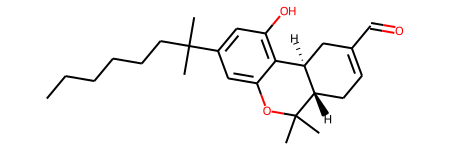

In [3]:
ligs[0]

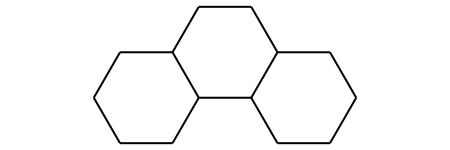

In [4]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff
scaffold(ligs[0])

In [5]:
drugbank_scaffolds = [scaffold(drug) for drug in drugs]
drugbank_scaffolds[:20]

RDKit ERROR: [12:29:14] ERROR: Explicit valence for atom # 0 C greater than permitted
[12:29:14] ERROR: Explicit valence for atom # 0 C greater than permitted
[12:29:14] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [12:29:14] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [12:29:15] Explicit valence for atom # 62 C, 6, is greater than permitted
[12:29:15] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [12:29:15] Explicit valence for atom # 6 C, 6, is greater than permitted
[12:29:15] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [12:29:16] Explicit valence for atom # 31 C, 6, is greater than permitted
[12:29:16] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [12:29:16] Explicit valence for atom # 14 C, 10, is greater than permitted
[12:29:16] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [12:29:17] Explicit val

 None,

In [6]:
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]
drugbank_scaffolds_smiles[:20]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (12, ''),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (15, ''),
 (16, ''),
 (17, ''),
 (18, 'C1CCCC1'),
 (19, ''),
 (20, '')]

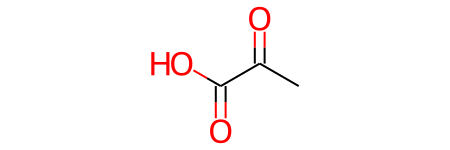

In [7]:
drugs[12]

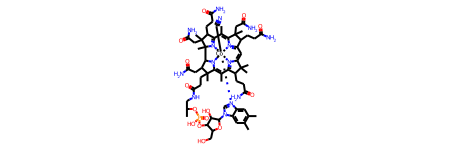

In [8]:
drugs[8]

In [9]:
scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)
scaffolds2drugs

{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': [0,
  2060],
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': [1,
  529],
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': [2, 5, 2325],
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': [3,
  4678],
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': [4],
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': [6],
 'C1CCCCC1': [7,
  13,
  27,
  39,
  54,
  56,
  59,
  67,
  72,
  73,
  78,
  81,
  82,
  89,
  102,
  108,
  112,
  123,
  126,
  127,
  131,
  134,
  149,
  154,
  155,
  161,
  171,
  181,
  192,
  196,
  198,
  202,
  206,
  224,
  228,
  234,
  257,
  258,
  268,
  276,
  285,
  305,
  306,
  310,
  315,
  318,
  333,
  336,
  346,
  350,
  361,
  370,
  375,
  376,
  378,
  381,
  386,
  408,
  416,
  429,
  430,
  435,
  443,
  459,
  477,
  479,
  484,
  494,
  495,
  497,
  512,
  514,

In [10]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:20]

(1545,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 3),
  ('C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 1),
  ('C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 1),
  ('C1CCCCC1', 1039),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
  ('C1CCCC1', 188),
  ('C1CCC2C(C1)CCC2C1CCCC1', 165),
  ('', 976),
  ('C1CC2CCCC2C1', 15),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 28),
  ('C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1', 2),
  ('C1CCC2CC3CCCCC3CC2C1', 57),
  ('C1CCC2CCCC2C1', 192),
  ('C1CCC(CC2CCCC2)CC1', 74),
  ('C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1', 17),
  ('C1CCC2CCCCC2C1', 170),
  ('C1CCC(C2CCCCC2C2CCCC2)CC1', 1)])

In [11]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:20]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 170),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
 ('C1CCC(CCCCC2CCCCC2)CC1', 53),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 48),
 ('C1CCC(CCC2CCCC2)CC1', 43),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 41),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 34)]

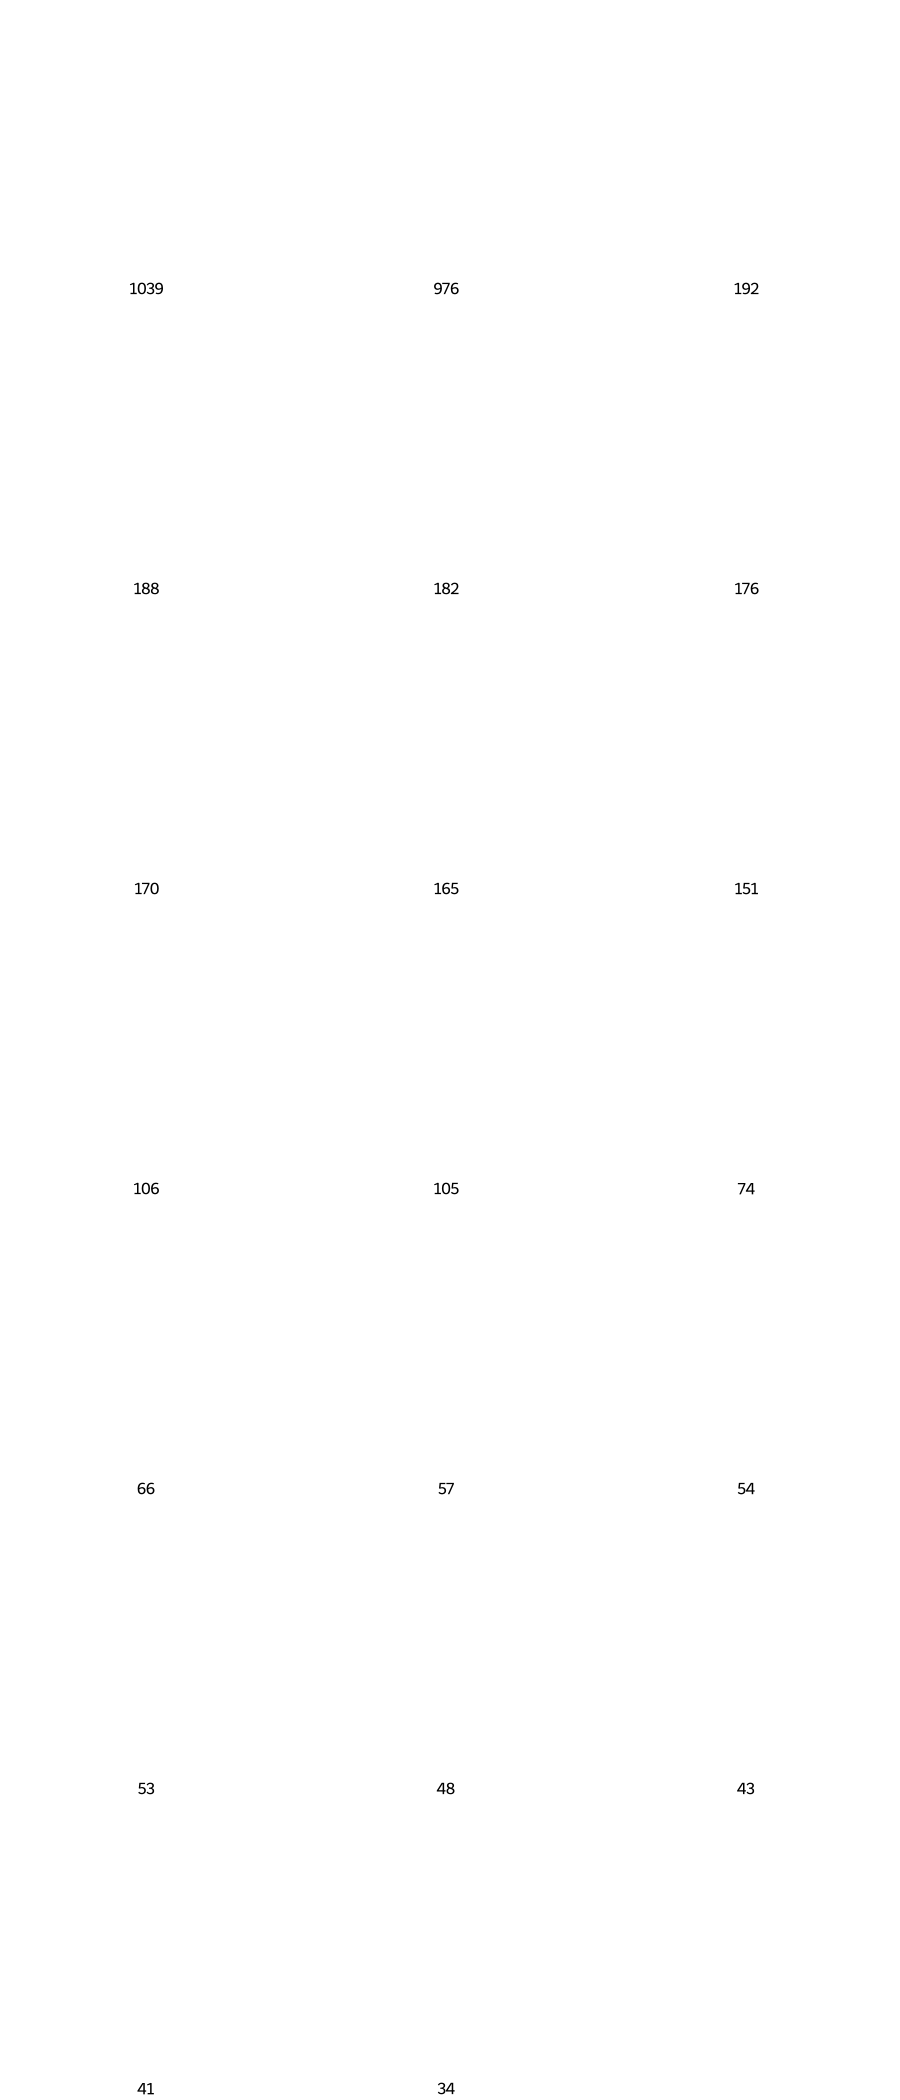

In [12]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[:20]],
                     molsPerRow=3, subImgSize = (300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[:20]])

In [13]:
can_scaffolds_smiles = []
for i, ligand in enumerate(ligs):
    can_scaffolds_smiles.append((i, Chem.MolToSmiles(scaffold(ligand)))) 
can_scaffolds_smiles[:20]

[(0, 'C1CCC2C(C1)CCC1CCCCC12'),
 (1, 'C1CCC2CCCCC2C1'),
 (2, 'C(CCCCC1CCCC2CCCCC12)CCCC1CC1'),
 (3, 'C1CCC2CCCC2C1'),
 (4, 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1'),
 (5, 'C1CCC(CCC2CC3CC(C4CCCCC4)CC3C3CCCCC23)CC1'),
 (6, 'C1CCCC(CCC2CC3CCCCC3C(CCC3CCCCC3)C2)CC1'),
 (7, 'C1CCC(C2CCC(CCCC3CCCC3)CC2)CC1'),
 (8, 'C1CCC(C2CCC(CCCC3CCCC3)CC2)CC1'),
 (9, 'C1CCC(CC2CCCC(CCC3CC4CCC3C4)C2)CC1'),
 (10, 'C(CCCCCCCC1CC1)CCCCCCC1CCCCC1'),
 (11, 'C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1'),
 (12, 'C1CCC(CCC2CC(CC3CC3)C3CCCCC23)CC1'),
 (13, 'C1CCC(CC2CC(CC3CC3)C3CC4CCCC4CC23)CC1'),
 (14, 'C1CCC(CCC2CCCC3C(CC4CC4)CC(CC4CCCCC4)C23)CC1'),
 (15, 'C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1'),
 (16, 'C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1'),
 (17, 'C1CCC(CCC2CC(CC3CCCCC3)C3CCCCC23)CC1'),
 (18, 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1'),
 (19, 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1')]

In [14]:
scaffolds2ligands = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in can_scaffolds_smiles}
for ligand_idx, scaffoldsmiles in can_scaffolds_smiles:
    scaffolds2ligands[scaffoldsmiles].append(ligand_idx)
scaffolds2ligands

{'C1CCC2C(C1)CCC1CCCCC12': [0,
  22,
  31,
  40,
  44,
  47,
  49,
  50,
  88,
  143,
  145,
  152,
  154,
  196,
  197,
  241,
  245,
  252,
  253,
  258,
  259,
  260,
  267,
  268,
  283,
  313,
  314,
  335,
  341,
  344,
  360,
  436,
  480,
  482,
  506,
  531,
  533,
  534,
  775,
  808,
  920,
  921,
  962,
  971,
  974,
  1033,
  1035,
  1071,
  1144,
  1200,
  1229,
  1238,
  1248,
  1249,
  1250,
  1270,
  1277,
  1288,
  1417,
  1449,
  1461,
  1474,
  1517,
  1518,
  1519,
  1520,
  1566,
  1603,
  1616,
  1632,
  1697,
  1741,
  1746,
  1757,
  1898,
  1899,
  1947,
  1963,
  1967,
  1983,
  1990,
  1991,
  2029,
  2036,
  2248,
  2259,
  2270,
  2301,
  2342,
  2397,
  2428,
  2450,
  2453,
  2480,
  2481,
  2487,
  2488,
  2557,
  2562,
  2586,
  2587,
  2588,
  2608,
  2710,
  2750,
  2762,
  2764,
  2799,
  2832,
  2833,
  2834,
  2839,
  2917,
  2922,
  2945,
  3012,
  3030,
  3042,
  3164,
  3173,
  3181,
  3188,
  3199,
  3200,
  3250,
  3336,
  3374,
  3419,
  346

In [15]:
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)
len(scaffold_ligandcount), scaffold_ligandcount

(1028,
 [('C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 330),
  ('C1CCCCC1', 273),
  ('C1CCC2C(C1)CCC1CCCCC12', 177),
  ('', 173),
  ('C1CCC(C2CCCCC2)CC1', 145),
  ('C1CCC(CCCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 87),
  ('C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1', 82),
  ('C1CCC2C(C1)CCCC2CC1CCC2CCCCC21', 82),
  ('C1CCC(CC2CCCCC2)CC1', 72),
  ('C1CCC(CC2CCC3CCCC4C(CC5CCCC6CCCCC65)CC2C34)CC1', 70),
  ('C1CCC(C2CCCC2C2CCCCC2)CC1', 59),
  ('C1CCC(C2CCCC3C2CC(C2CCCCC2)C3C2CCCCC2)CC1', 57),
  ('C1CCC(CCC2CC(CC3CCCCC3)C3CCCCC23)CC1', 54),
  ('C1CCC2CCCCC2C1', 52),
  ('C1CCC(C2CC3CCCCC3C2C2CCCCC2)CC1', 51),
  ('C1CCC2CC(CCC34CC5CC(CC(C5)C3)C4)CCC2C1', 49),
  ('C1CCC(CC2CCC3CCCCC3C2)CC1', 48),
  ('C1CCC(CCC2CCC(C3CCCC4C3CC(C3CCCCC3)C4C3CCCCC3)CC2)CC1', 47),
  ('C1CCC(CCC2CC(CC3CC3)C3CCCCC23)CC1', 46),
  ('C1CCC(CC2CC(CCC3CC4CCC3C4)CC2C2CCCCC2)CC1', 46),
  ('C1CCC(CC2CCCCC2CC2CCCCC2)CC1', 44),
  ('C1CCC(CCC2CC(C3CCCCC3)C(C3CCCC3)C2)CC1', 43),
  ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 43),
  ('C1CCC(CC2CCC3C(CCC4CCCCC

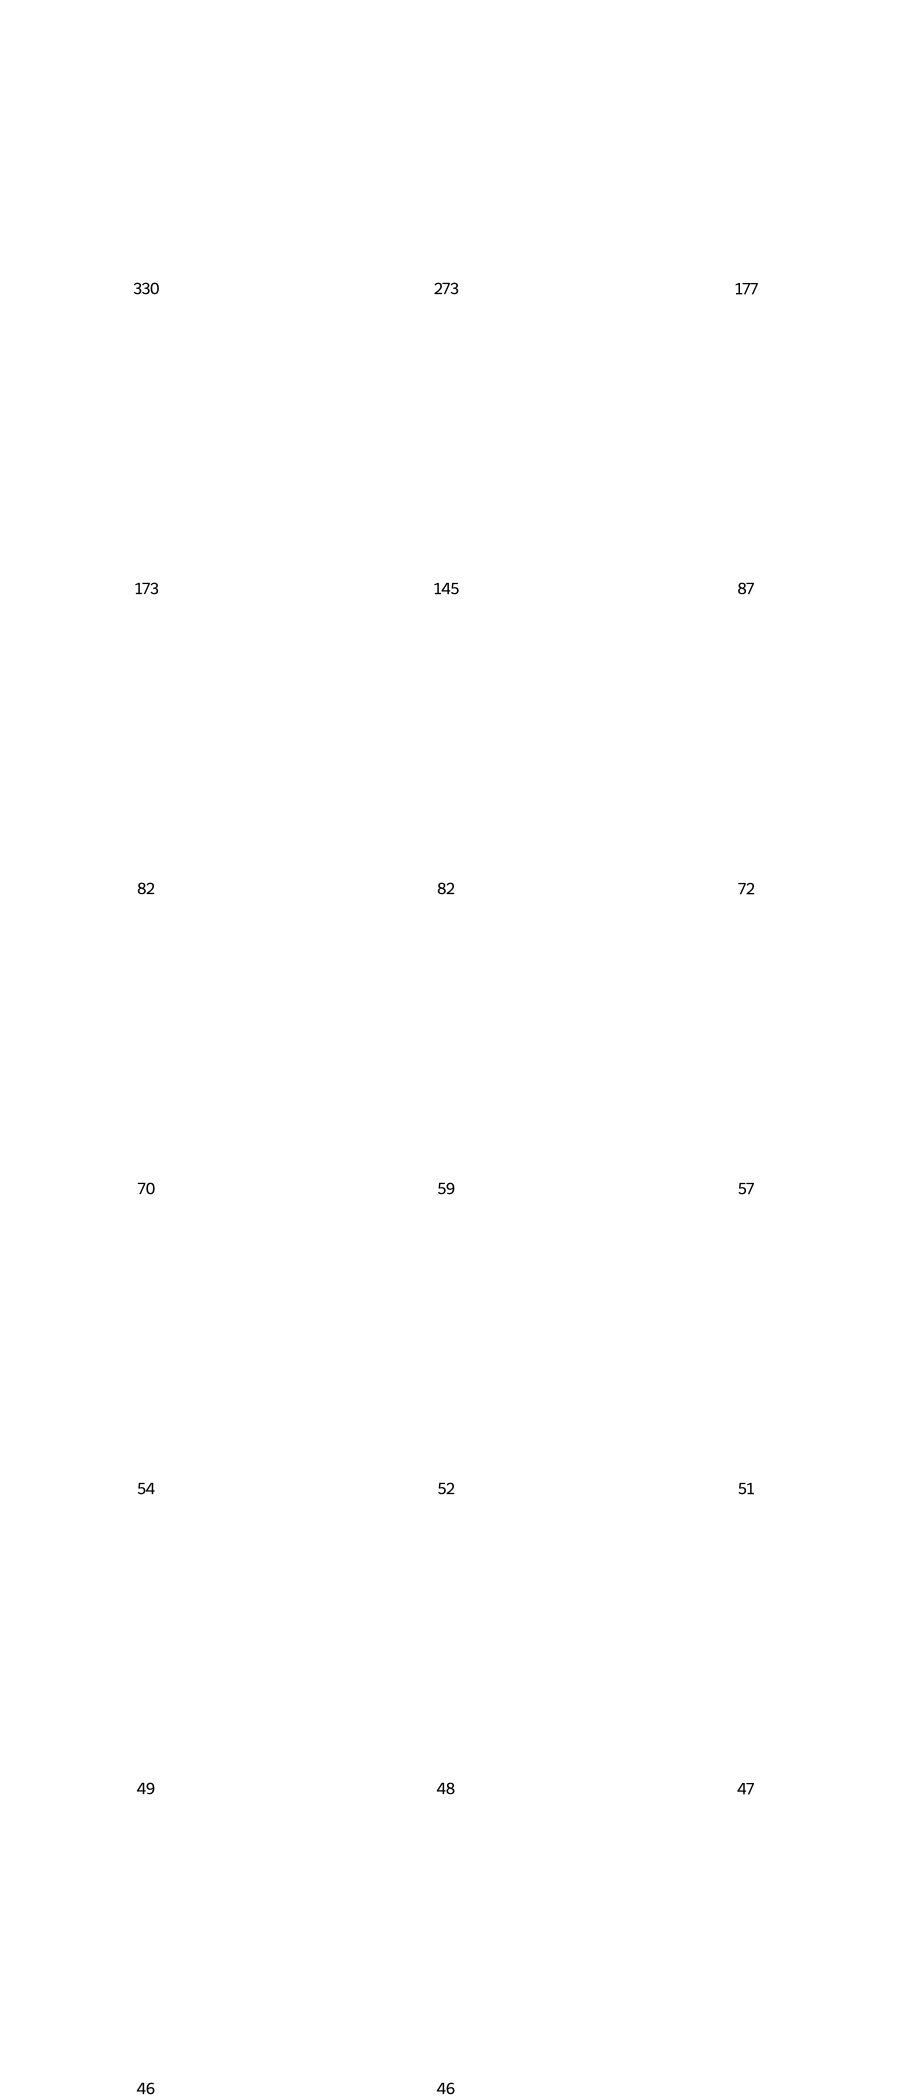

In [16]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:20]],
                     molsPerRow=3, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:20]])

In [17]:
scaffold_ligandcount[0]

('C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 330)

In [18]:
x, y = scaffold_ligandcount[0]

In [19]:
x

'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1'

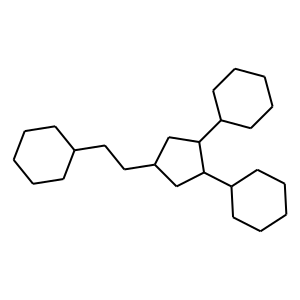

In [20]:
m = Chem.MolFromSmiles(x)
Draw.MolToImage(m)

In [21]:
def mol2svg(mol):
    """Converting RDKit mol to SVG. Didn't figure how to display it inline in a dataframe, though."""
    d2d = rdMolDraw2D.MolDraw2DSVG(300,300)
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    return d2d.GetDrawingText()

In [22]:
def mol2png(mol):
    """Converting RDKit mol to PNG PIL object"""
    d2d = rdMolDraw2D.MolDraw2DCairo(300,300)
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    image = Image.open(BytesIO(d2d.GetDrawingText()))
    return image

In [23]:
def format_image(img):
    """Format arbitrary PNG image object for inline display"""
    buffer = BytesIO()
    img.save(buffer, 'png')
    return f'<img src="data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}">'

In [24]:
def mol2display_png(mol):
    """Format RDKit mol for direct inline display. The most convenient, probably."""
    d2d = rdMolDraw2D.MolDraw2DCairo(400,400)
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    buffer = BytesIO(d2d.GetDrawingText())
    return f'<img src="data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}">'

In [53]:
def mol2scaffold(mol):
    try:
        scaffold1 = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
        scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
    except ValueError:
        return Chem.MolFromSmiles('*')
    return scaffold3

In [26]:
ligands = pd.DataFrame(ligs, columns=['mol'])

,mol
0,
1,
2,
3,
4,

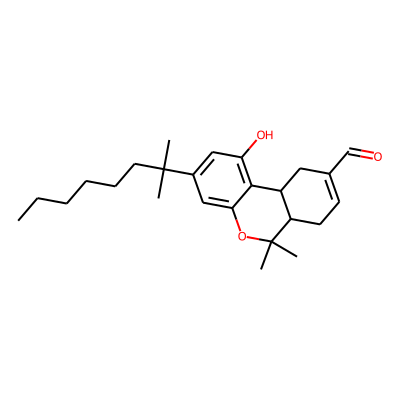
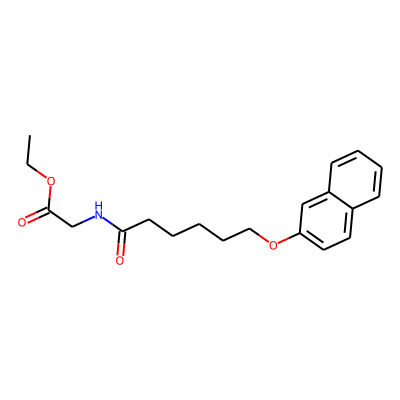
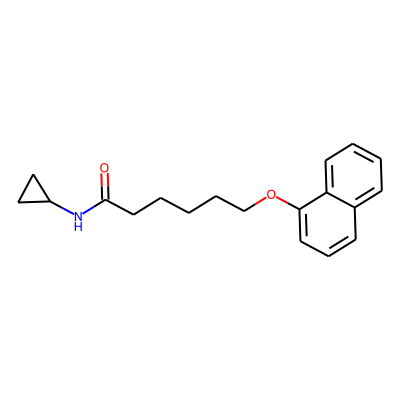
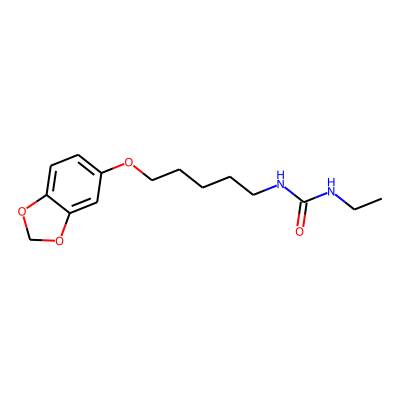
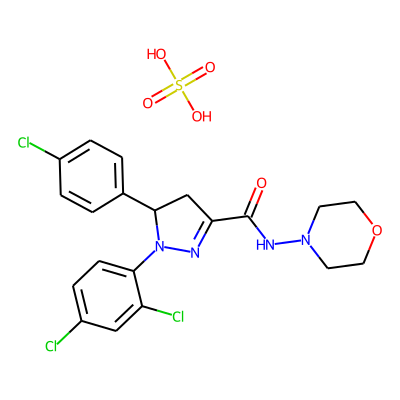

In [27]:
HTML(ligands.head().to_html(formatters={'mol': mol2display_png}, escape=False))

,mol,scaffold,scaffold_smiles
0,,,C1CCC2C(C1)CCC1CCCCC12
1,,,C1CCC2CCCCC2C1
2,,,C(CCCCC1CCCC2CCCCC12)CCCC1CC1
3,,,C1CCC2CCCC2C1
4,,,C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1
5,,,C1CCC(CCC2CC3CC(C4CCCCC4)CC3C3CCCCC23)CC1
6,,,C1CCCC(CCC2CC3CCCCC3C(CCC3CCCCC3)C2)CC1
7,,,C1CCC(C2CCC(CCCC3CCCC3)CC2)CC1
8,,,C1CCC(C2CCC(CCCC3CCCC3)CC2)CC1
9,,,C1CCC(CC2CCCC(CCC3CC4CCC3C4)C2)CC1

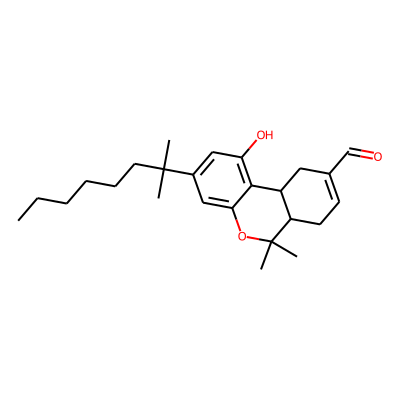
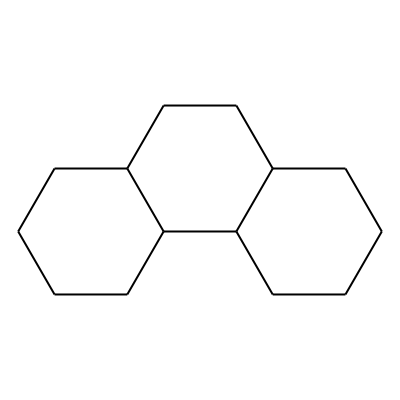
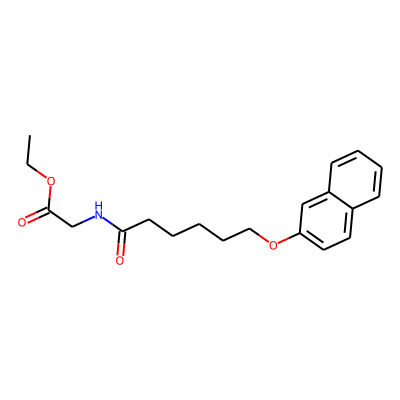
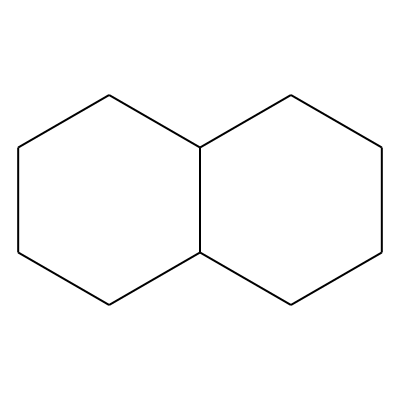
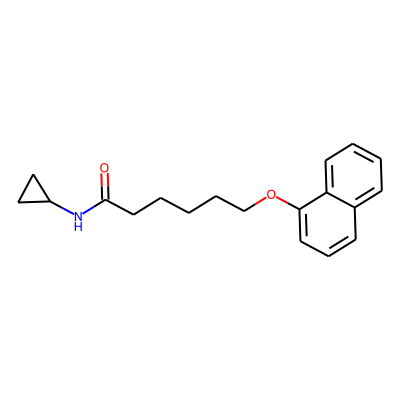
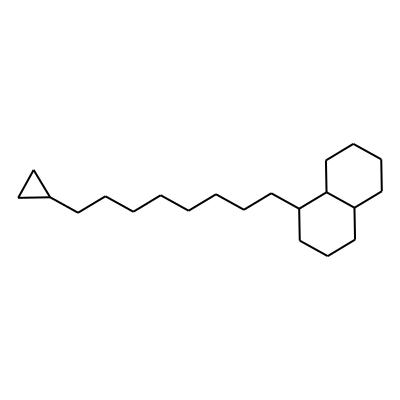
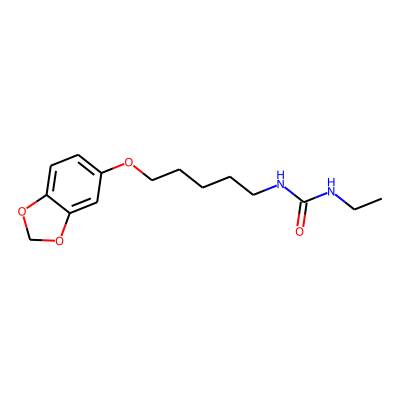
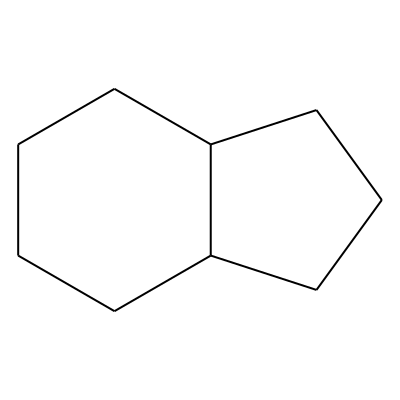
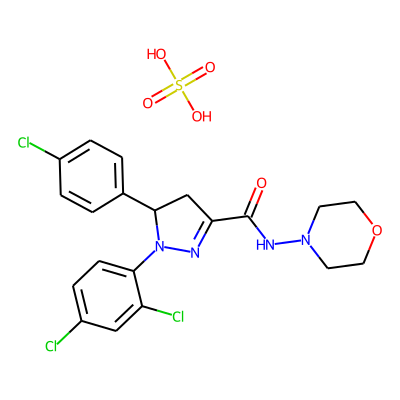
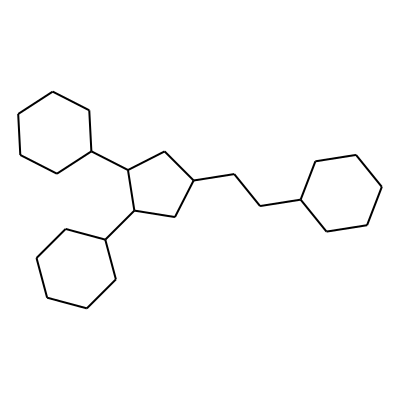
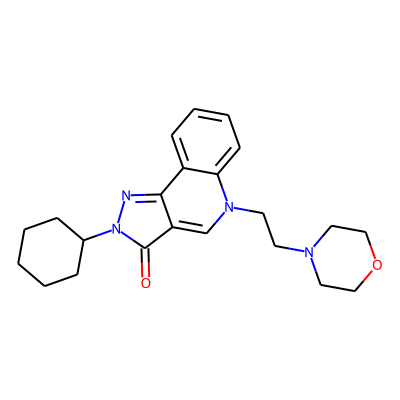
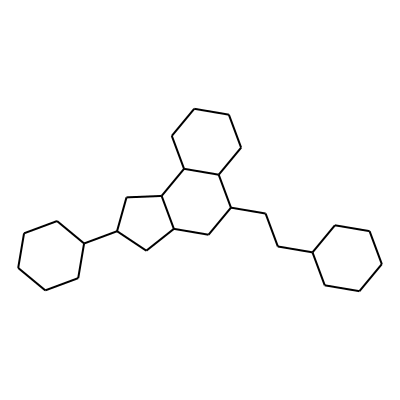
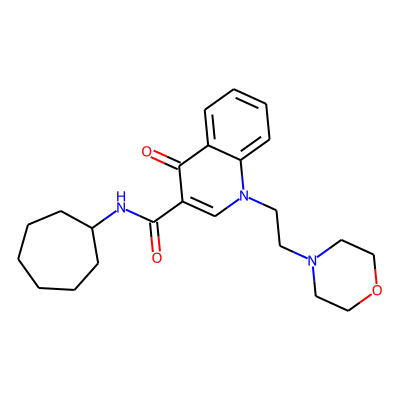
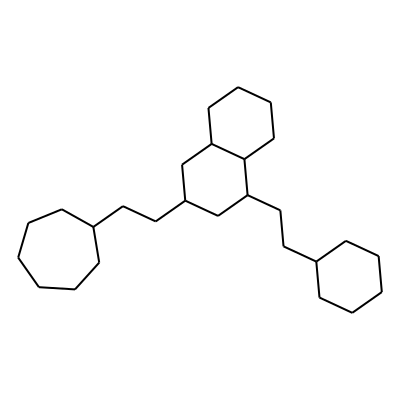
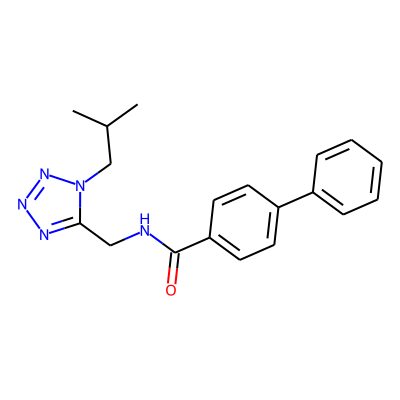
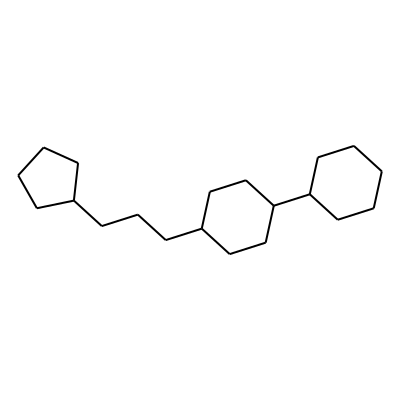
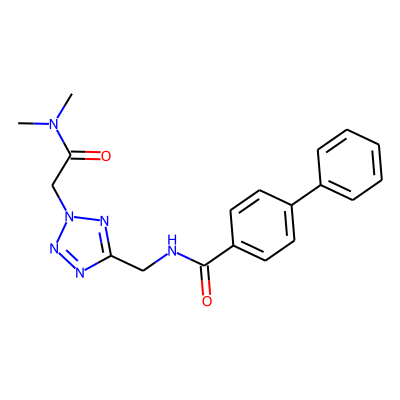
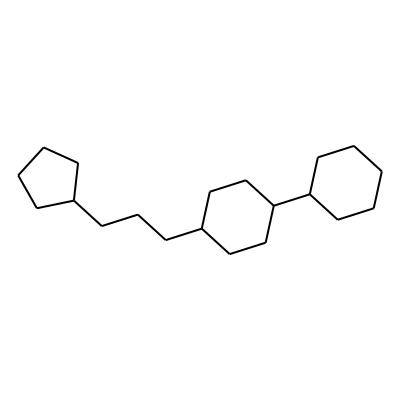
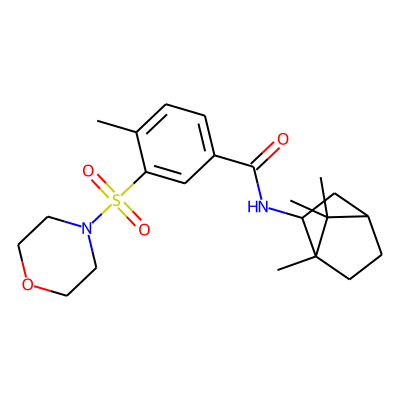
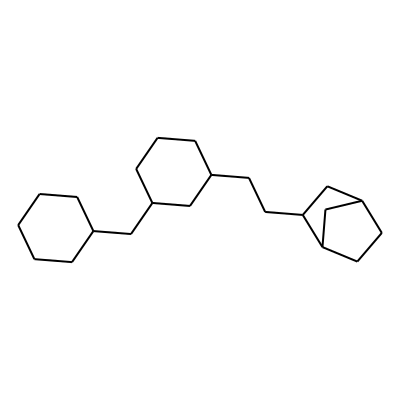
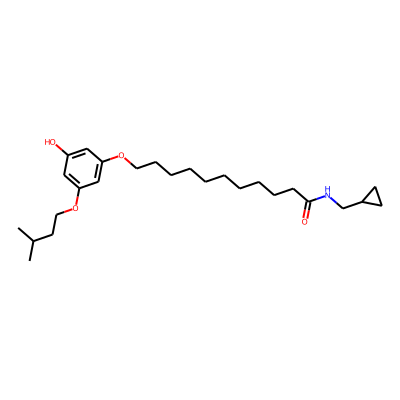
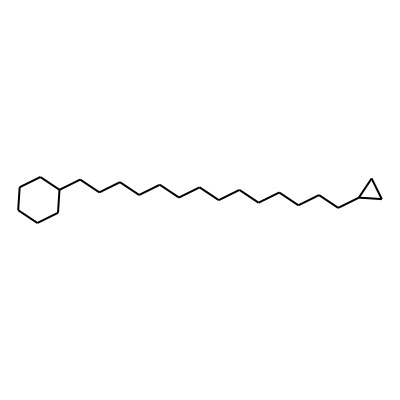
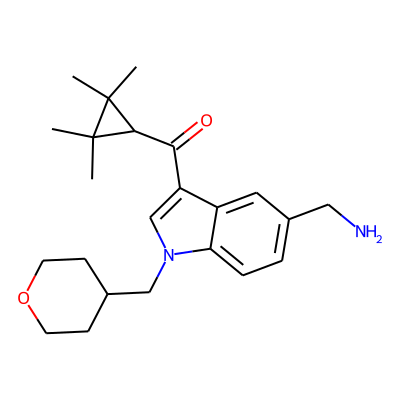
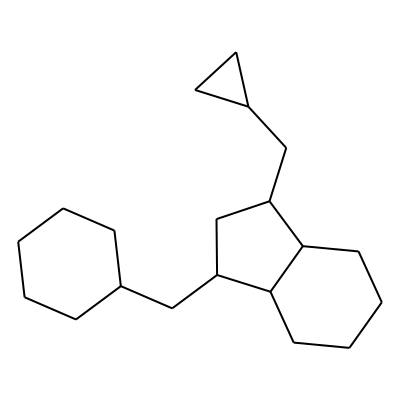
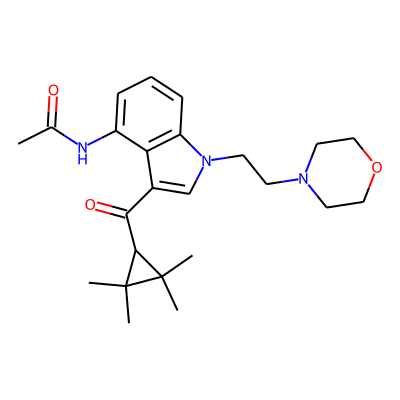
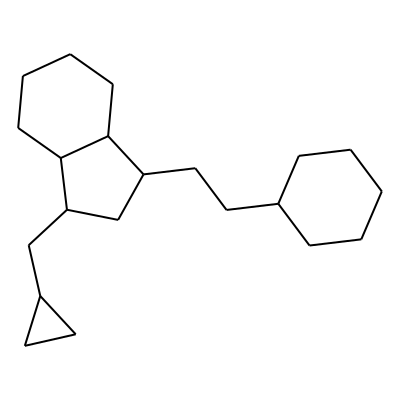
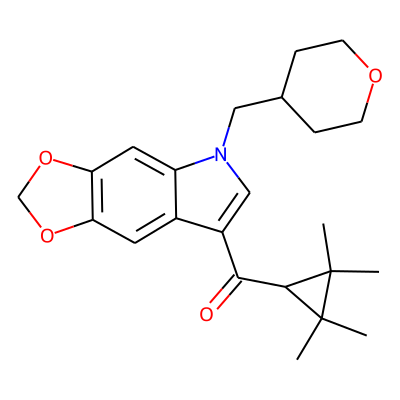
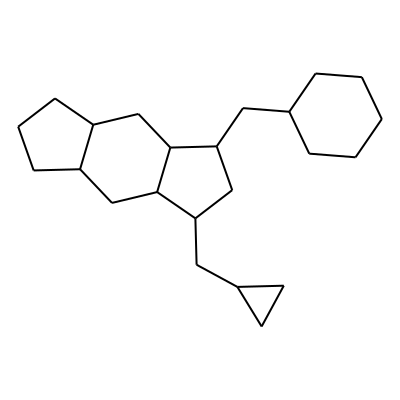
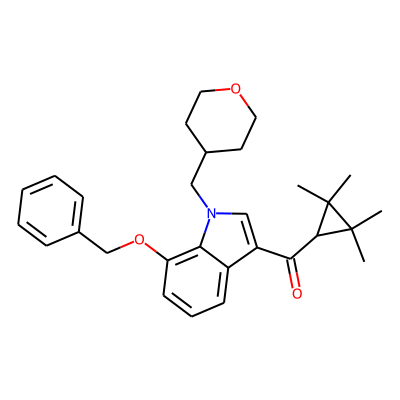
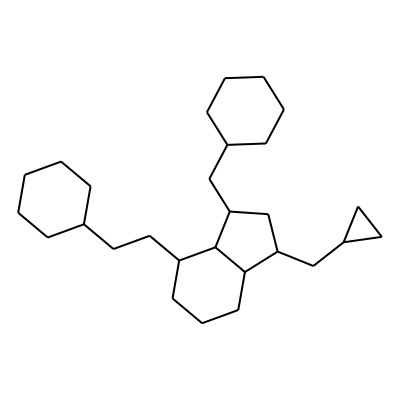
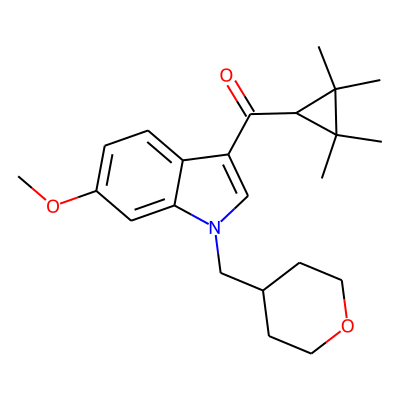
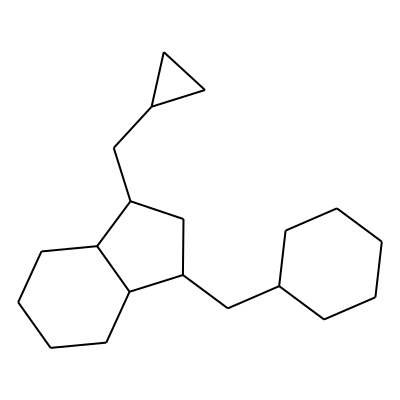
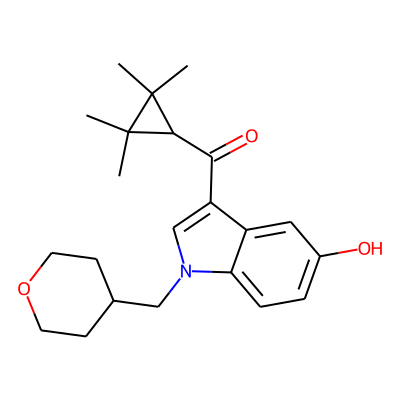
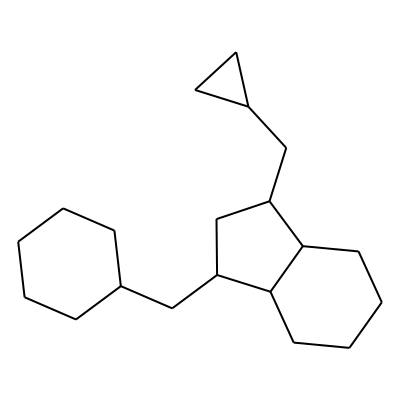
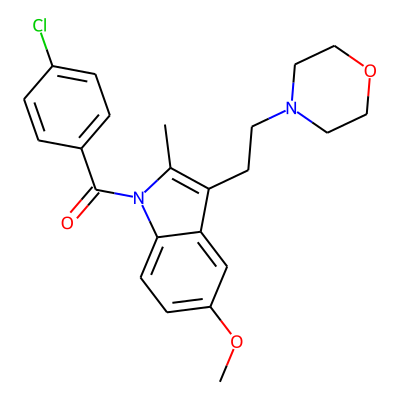
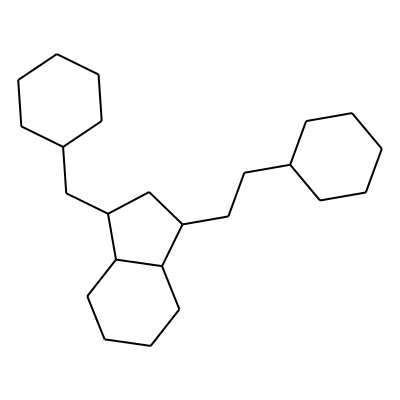
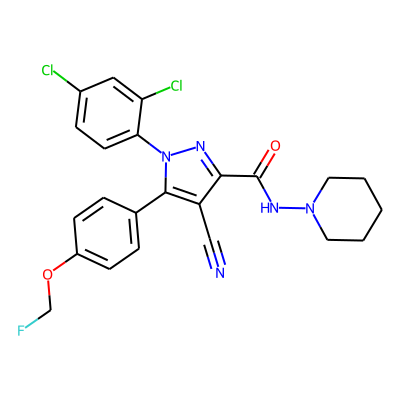
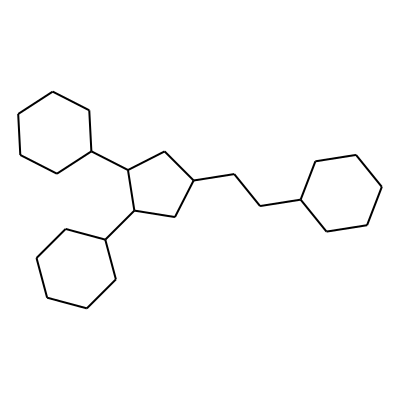
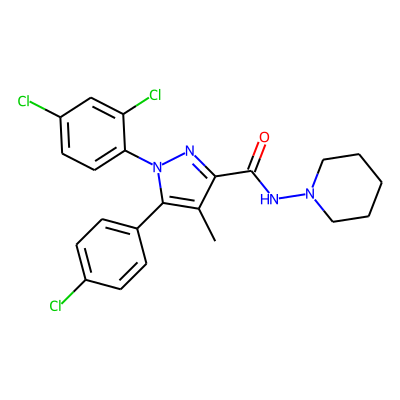
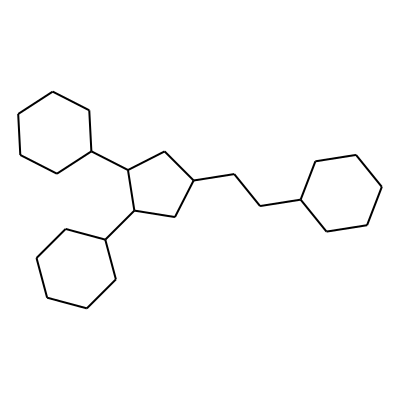

In [32]:
ligands['scaffold'] = ligands['mol'].apply(mol2scaffold)
ligands['scaffold_smiles'] = ligands['scaffold'].apply(lambda x: Chem.MolToSmiles(x))
HTML(ligands.head(20).to_html(formatters={'mol': mol2display_png, 'scaffold': mol2display_png}, escape=False))
#vykreslovat pres head, aby se to nekouslo

In [29]:
ligands_scaffolds = ligands.groupby('scaffold_smiles').count()
ligands_scaffolds.sort_values('scaffold', inplace=True, ascending=False)
ligands_scaffolds['scaffold_mol'] = ligands_scaffolds.index.to_series().apply(lambda x: Chem.MolFromSmiles(x))
ligands_scaffolds

,mol,scaffold,scaffold_mol
scaffold_smiles,,,
C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1,330,330,"<img data-content=""rdkit/molecule"" src=""data:i..."
C1CCCCC1,273,273,"<img data-content=""rdkit/molecule"" src=""data:i..."
C1CCC2C(C1)CCC1CCCCC12,177,177,"<img data-content=""rdkit/molecule"" src=""data:i..."
,173,173,"<img data-content=""rdkit/molecule"" src=""data:i..."
C1CCC(C2CCCCC2)CC1,145,145,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...
C1CCC(CC2CCCCC2CC2CCCC3CCCCC32)CC1,1,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
C1CCC(CC2CCCCC2CC2CCCCC2C2CCCCC2)CC1,1,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
C1CCC(CC2CCCCC2CC2CCCCC2CC2CC2)CC1,1,1,"<img data-content=""rdkit/molecule"" src=""data:i..."


,scaffold,scaffold_mol
scaffold_smiles,,
C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1,330,
C1CCCCC1,273,
C1CCC2C(C1)CCC1CCCCC12,177,
,173,
C1CCC(C2CCCCC2)CC1,145,
C1CCC(CCCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1,87,
C1CCC2C(C1)CCCC2CC1CCC2CCCCC21,82,
C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1,82,
C1CCC(CC2CCCCC2)CC1,72,

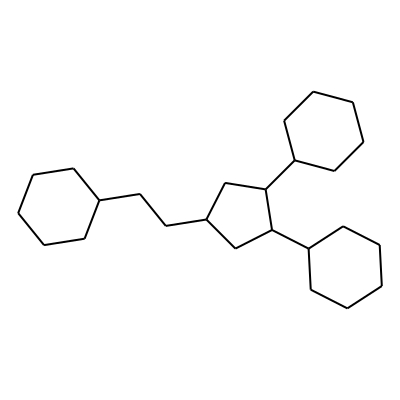
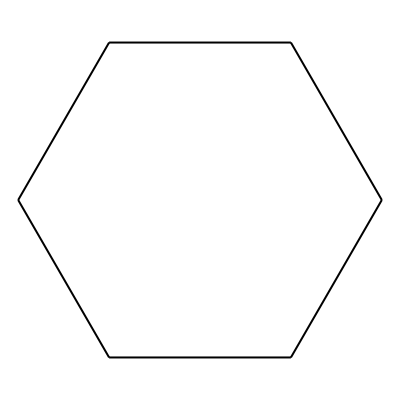
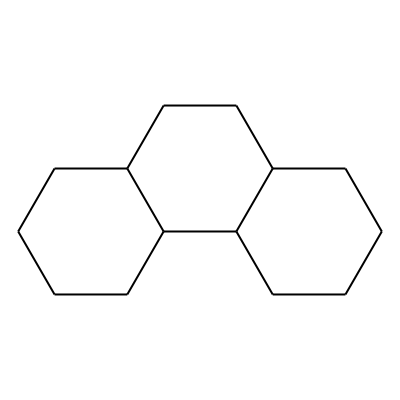
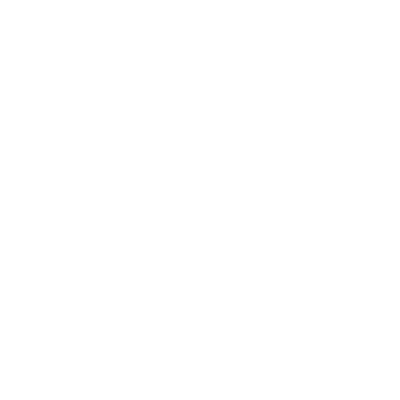
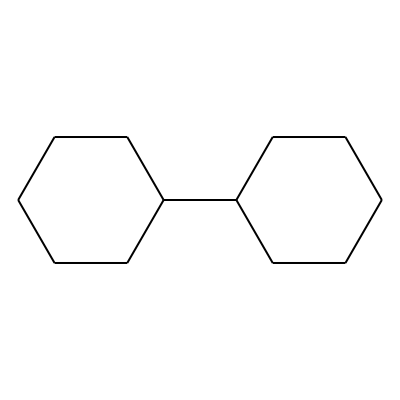
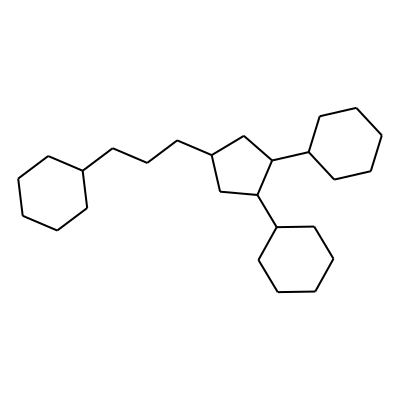
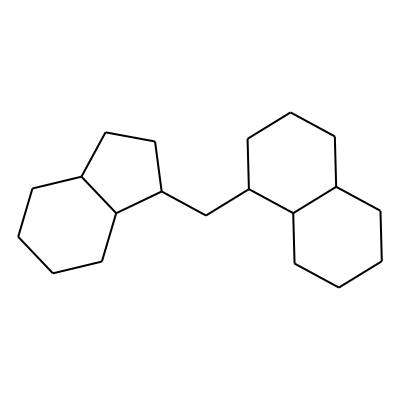
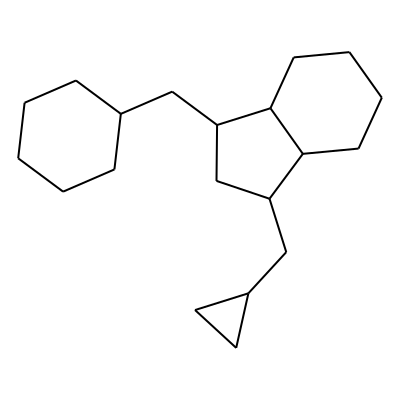
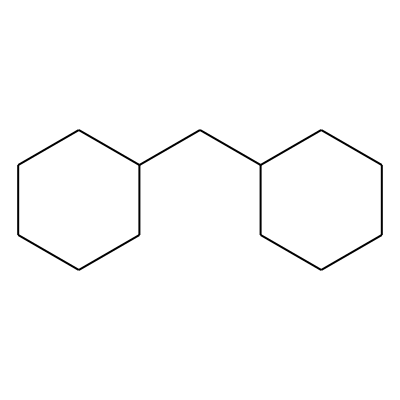
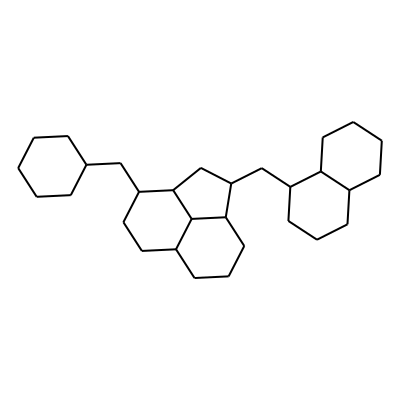
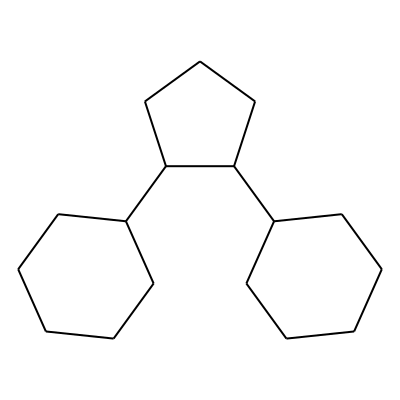
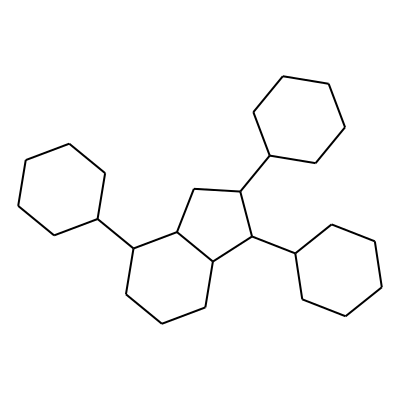
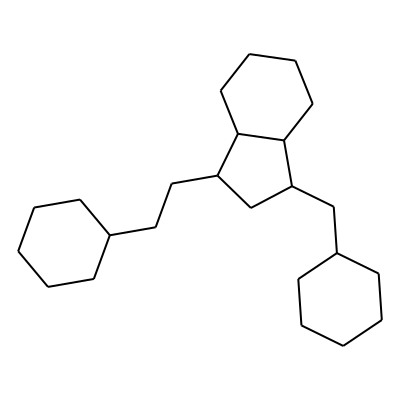
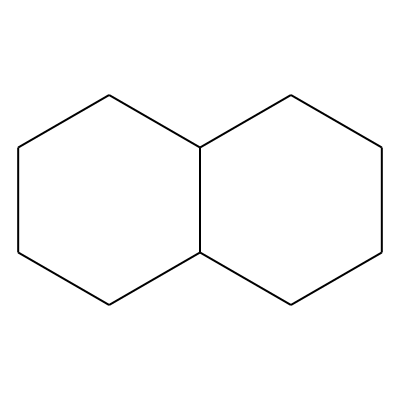
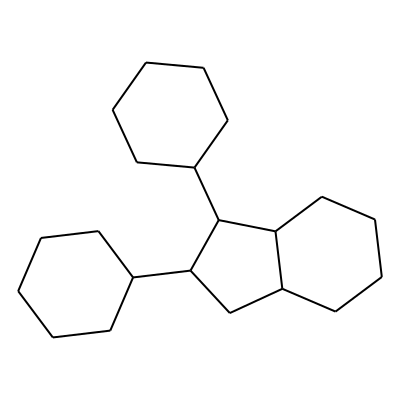
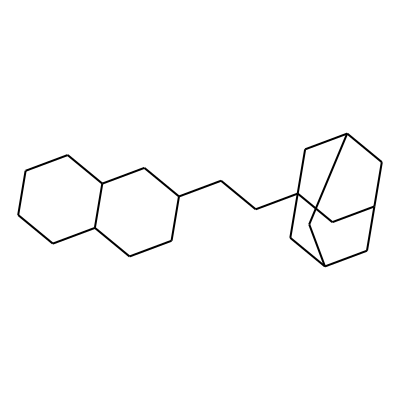
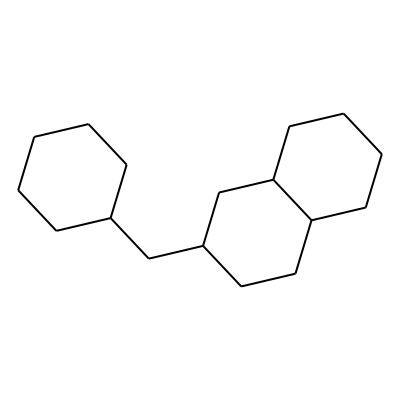
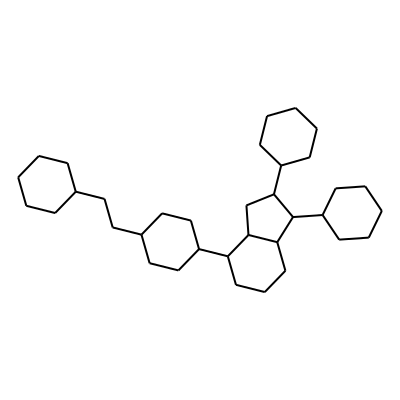
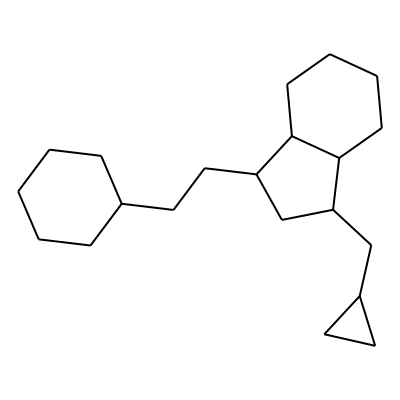
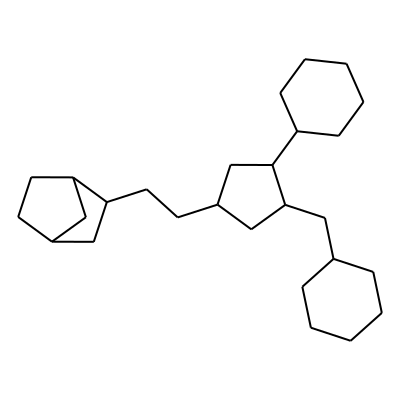

In [59]:
ligands['scaffold'] = ligands['mol'].apply(mol2scaffold)
ligands['scaffold_smiles'] = ligands['scaffold'].apply(lambda x: Chem.MolToSmiles(x))
HTML(ligands_scaffolds[['scaffold', 'scaffold_mol']].head(20).to_html(
    formatters={'scaffold_mol': mol2display_png}, escape=False))

In [40]:
druggies = pd.DataFrame(drugs, columns=['mol'])

,mol
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

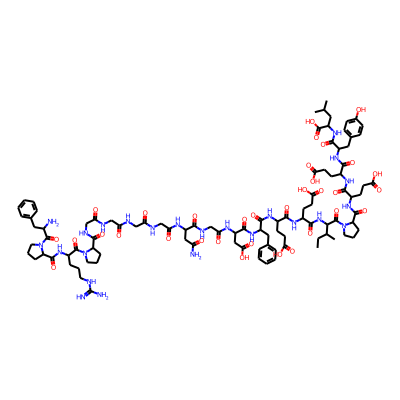
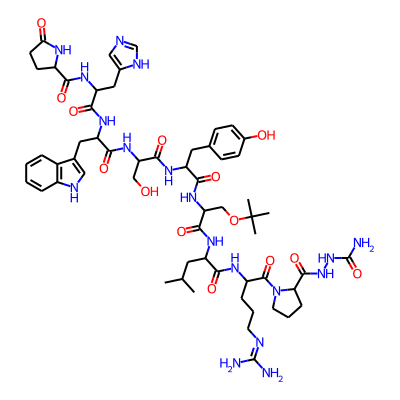
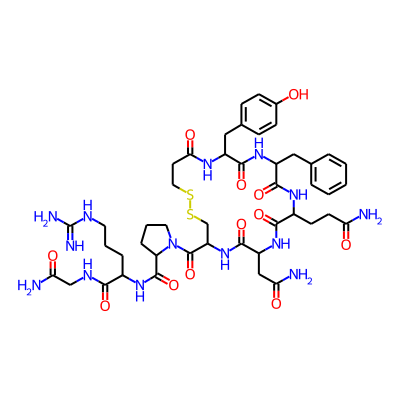
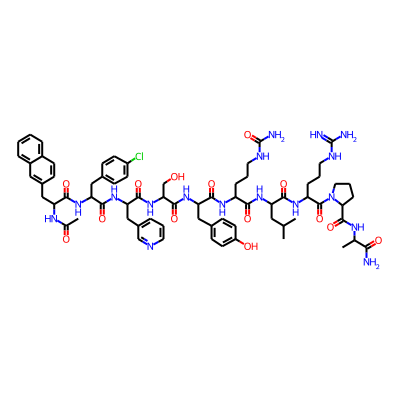
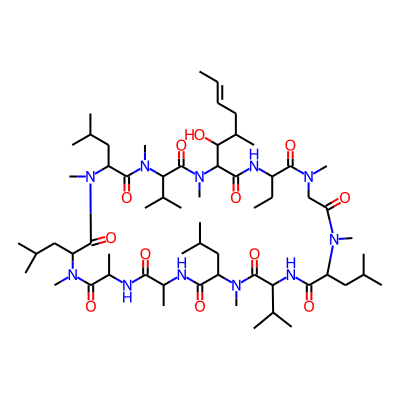
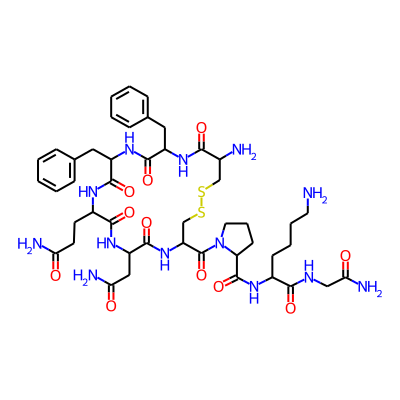
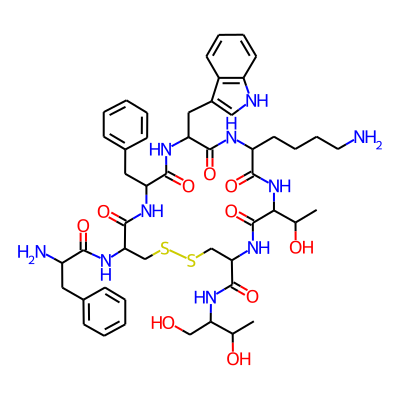
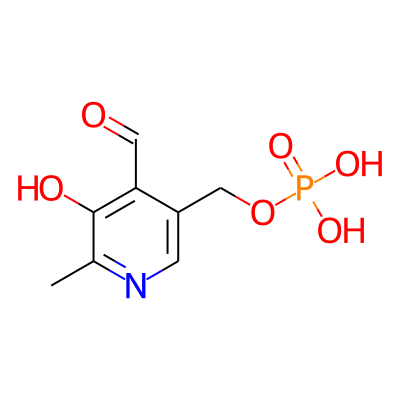
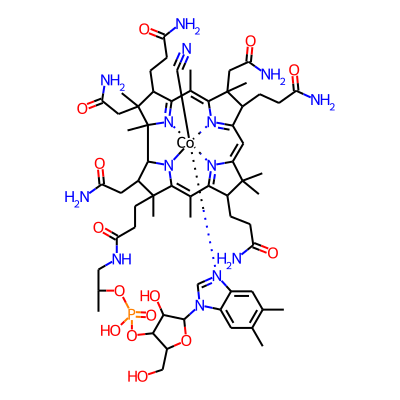
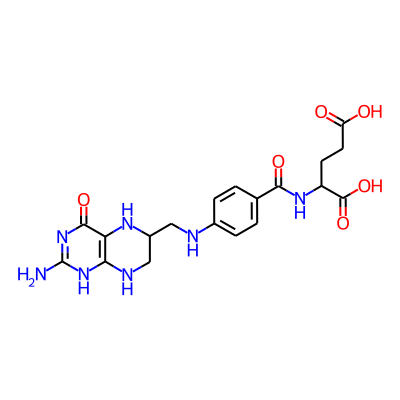
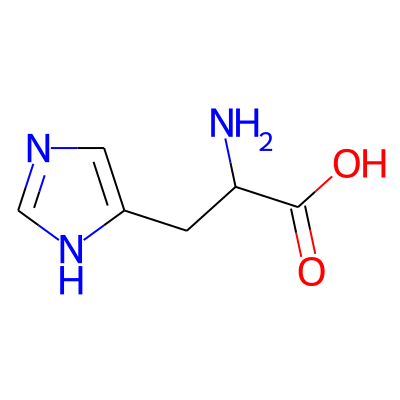
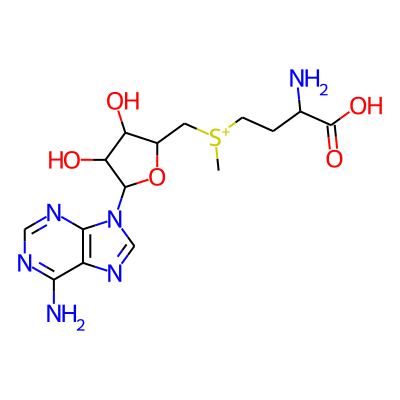
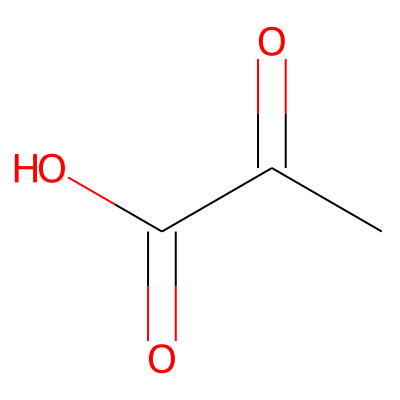
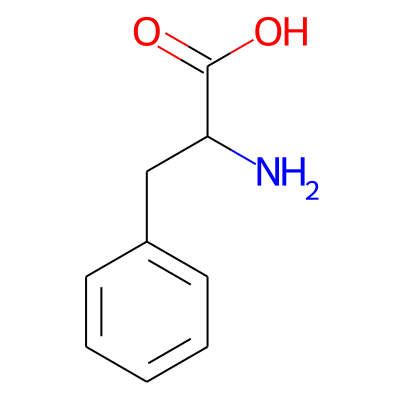
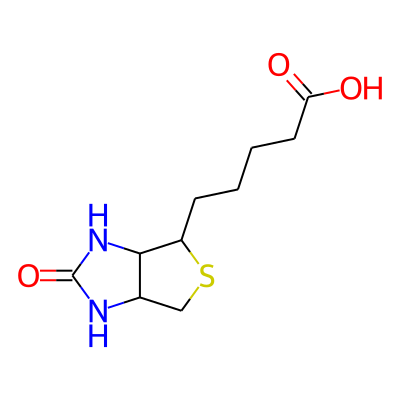
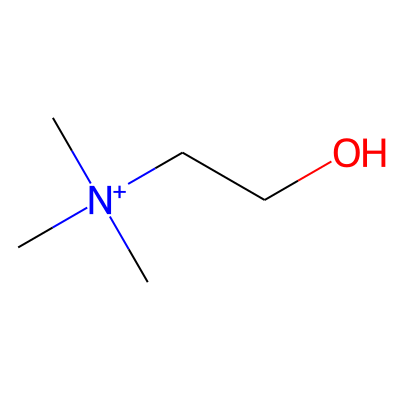
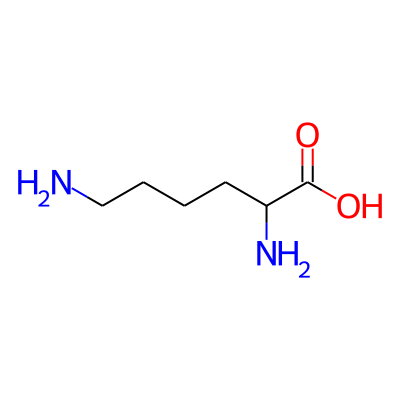
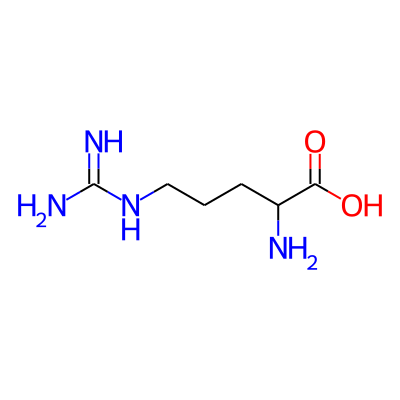
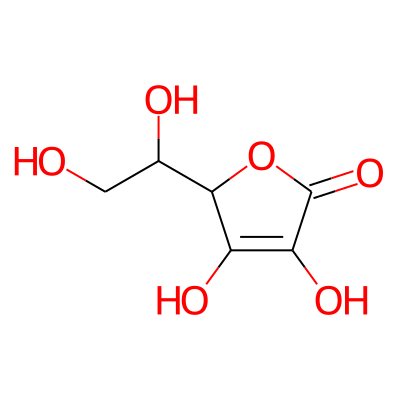
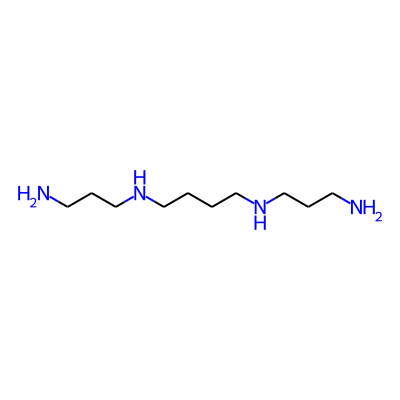
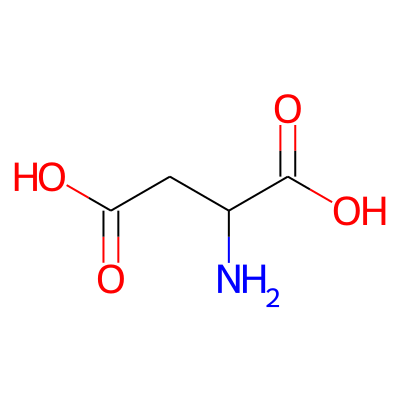
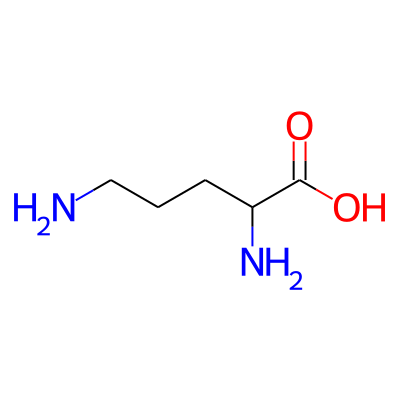
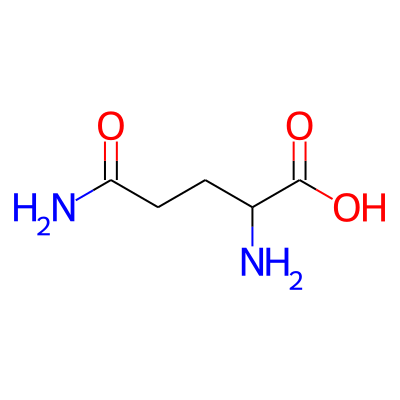
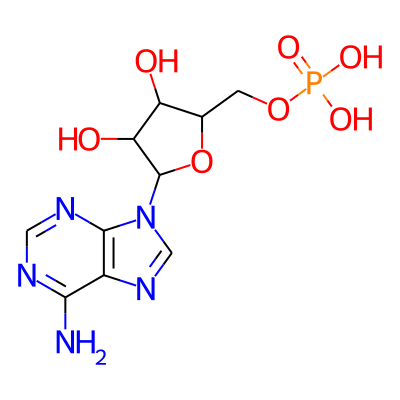
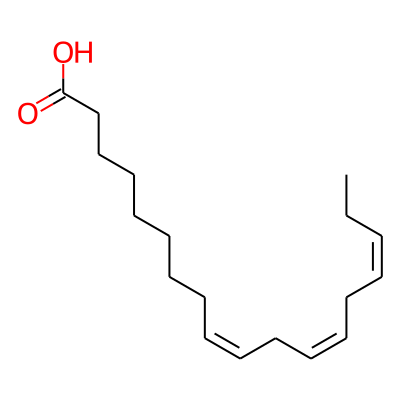
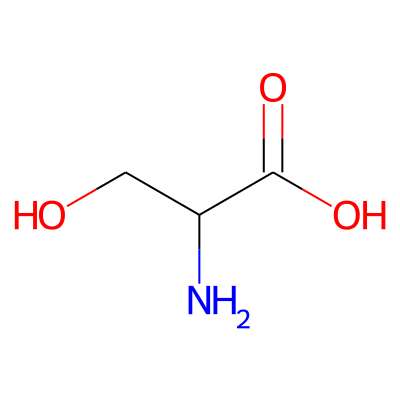
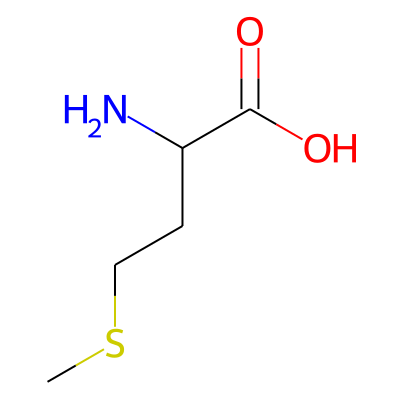
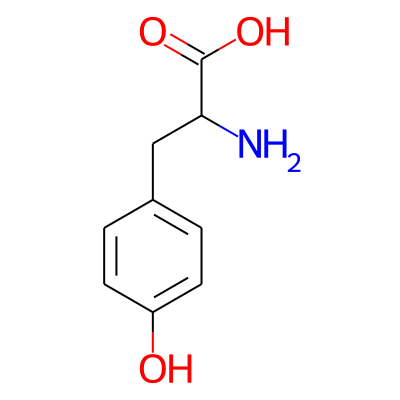
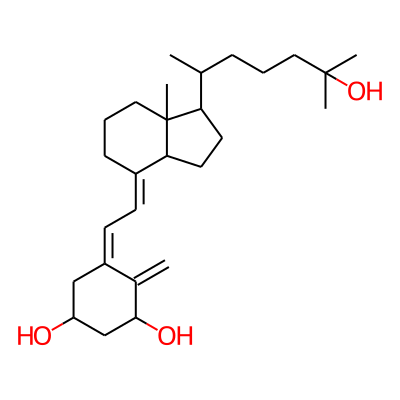
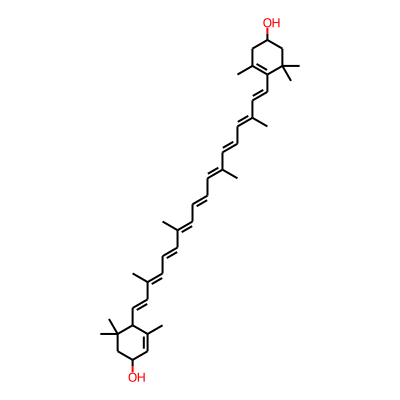

In [41]:
HTML(druggies.head(30).to_html(formatters={'mol': mol2display_png}, escape=False))

In [52]:
for i in range(len(druggies)):
    if i == 8:
        continue
    if i == 91:
        continue
    if i == 1446:
        continue
    if i == 1482:
        continue
    if i == 3196:
        continue
    if i == 3436:
        continue
    if i == 3663:
        continue
    mol2scaffold(druggies.at[i, 'mol'])
    print(i)

0
1
2
3
4
5
6
7
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278

1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105


3657
3658
3659
3660
3661
3662
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857


5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699


RDKit ERROR: [13:29:37] Explicit valence for atom # 48 C, 5, is greater than permitted
[13:29:37] Explicit valence for atom # 48 C, 5, is greater than permitted
RDKit ERROR: [13:29:37] Explicit valence for atom # 41 C, 5, is greater than permitted
[13:29:37] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [13:29:39] Explicit valence for atom # 30 C, 6, is greater than permitted
[13:29:39] Explicit valence for atom # 30 C, 6, is greater than permitted
RDKit ERROR: [13:29:39] Explicit valence for atom # 14 C, 10, is greater than permitted
[13:29:39] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [13:29:40] Explicit valence for atom # 28 C, 5, is greater than permitted
[13:29:40] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [13:29:40] Explicit valence for atom # 30 C, 6, is greater than permitted
[13:29:40] Explicit valence for atom # 30 C, 6, is greater than permitted
RDKit WARNING: [13:29:40] WARNIN

,mol,scaffold,scaffold_smiles
0,,,C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1
1,,,C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1
2,,,C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1
3,,,C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1
4,,,C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1
5,,,C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1
6,,,C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1
7,,,C1CCCCC1
8,,,*
9,,,C1CCC(CCC2CCC3CCCCC3C2)CC1

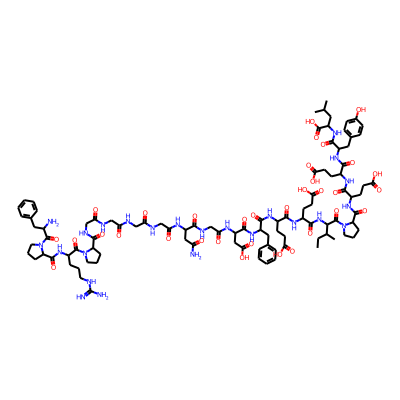
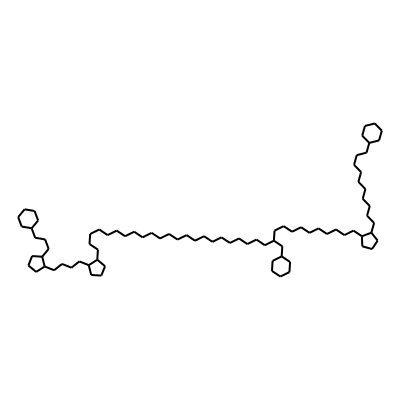
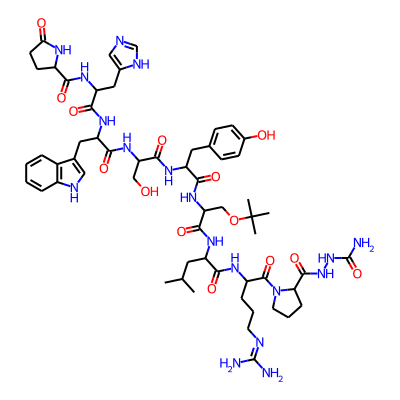
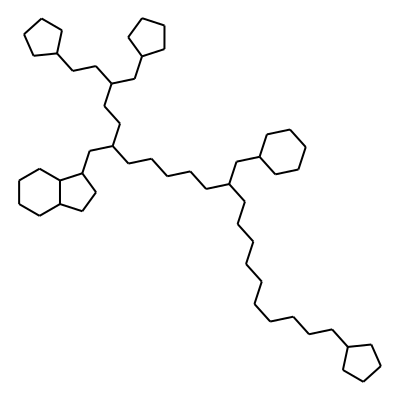
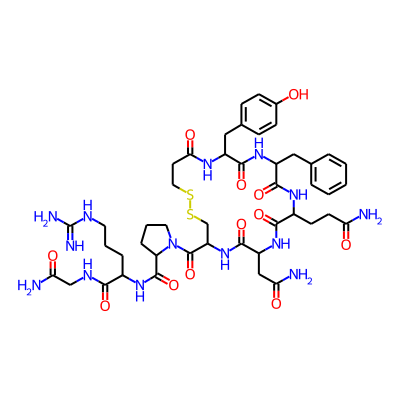
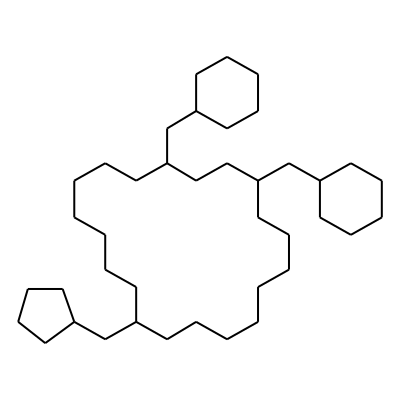
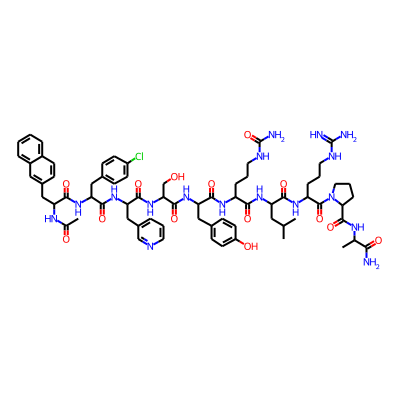
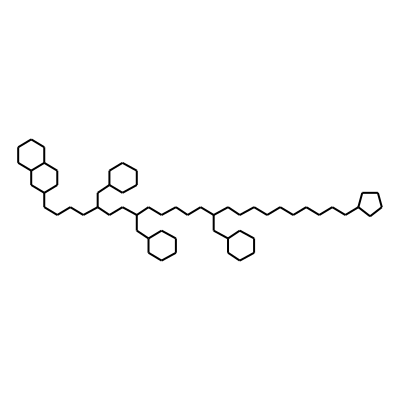
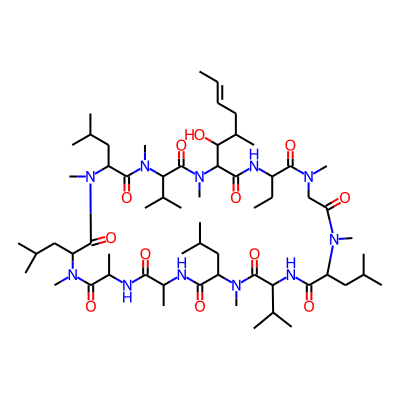
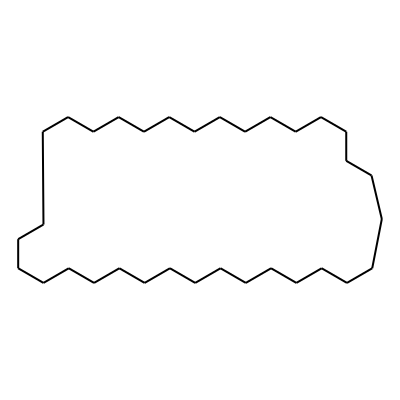
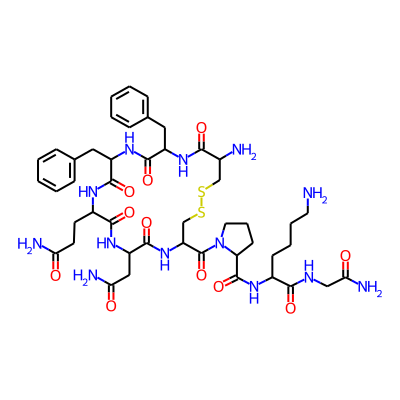
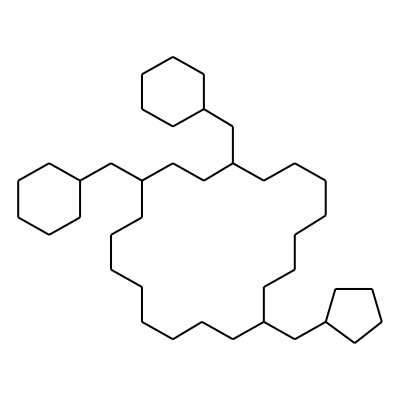
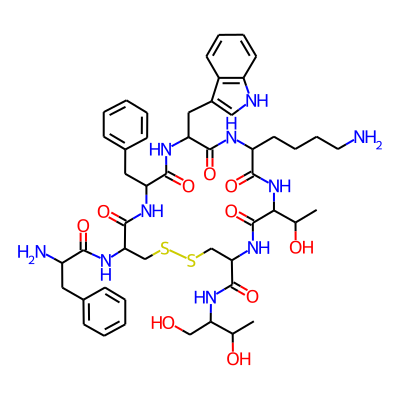
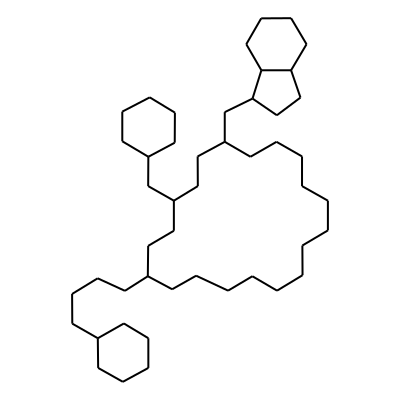
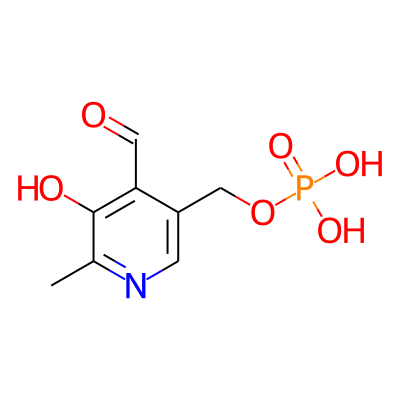
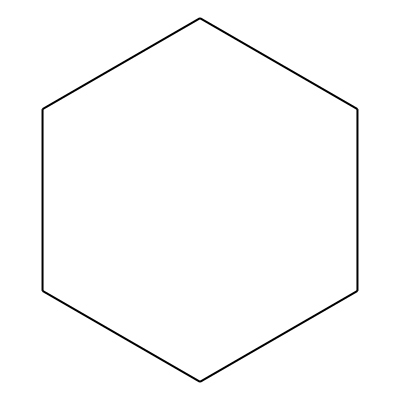
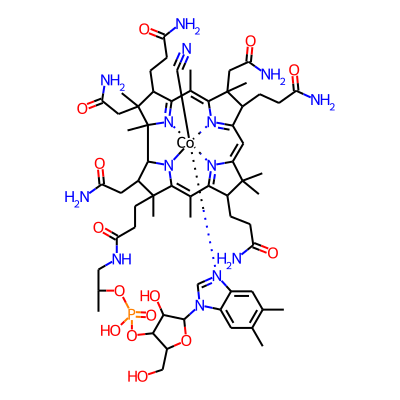
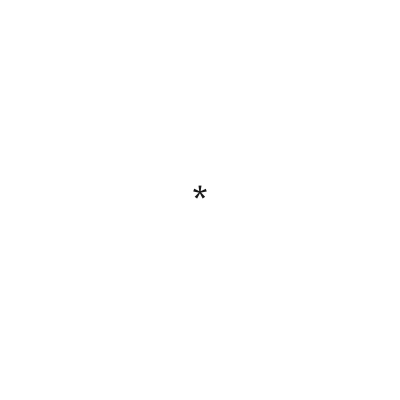
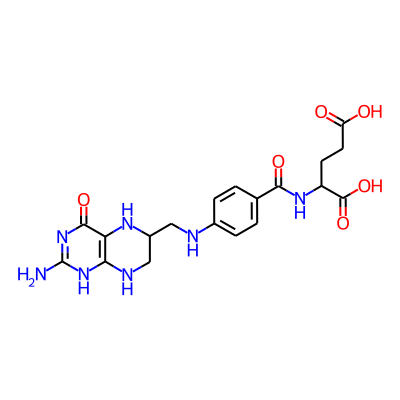
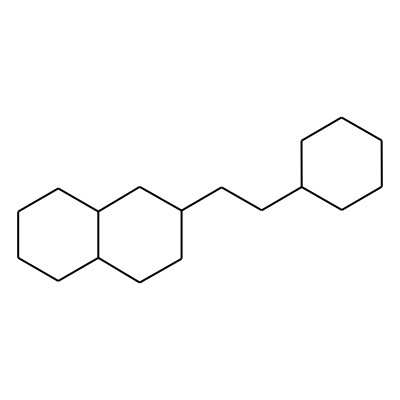
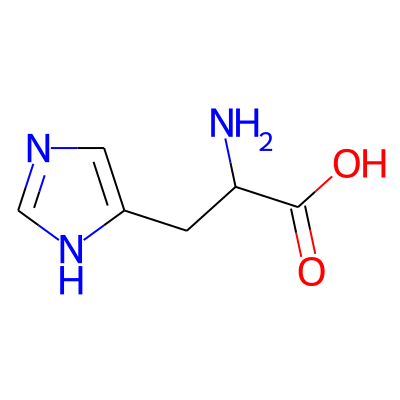
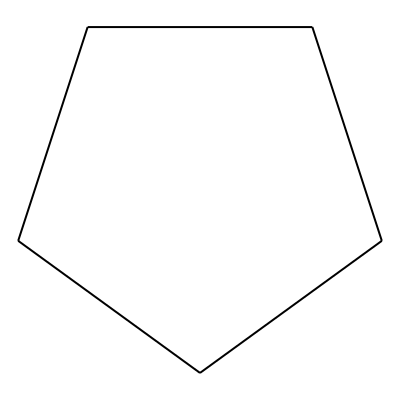
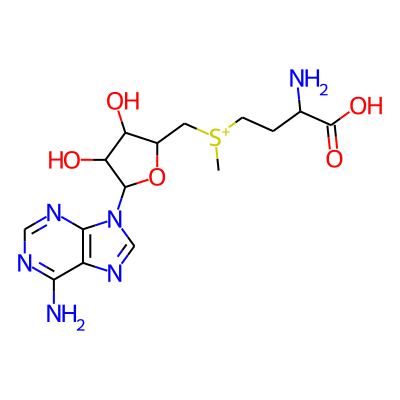
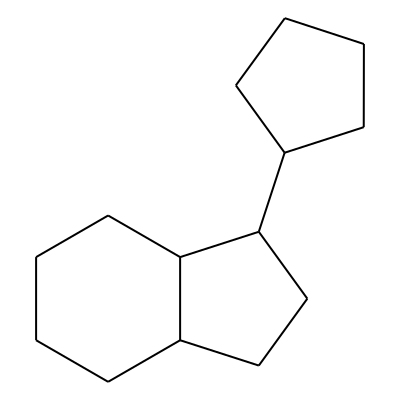
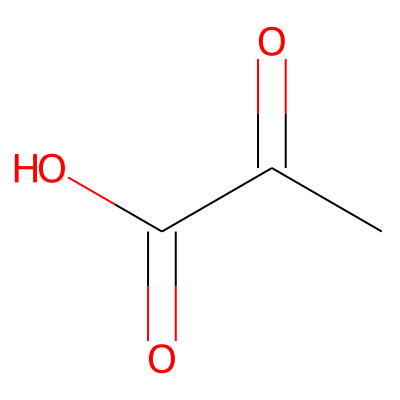
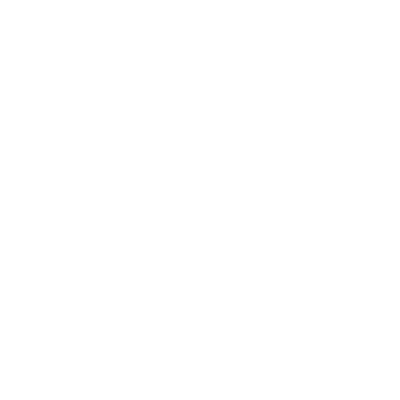
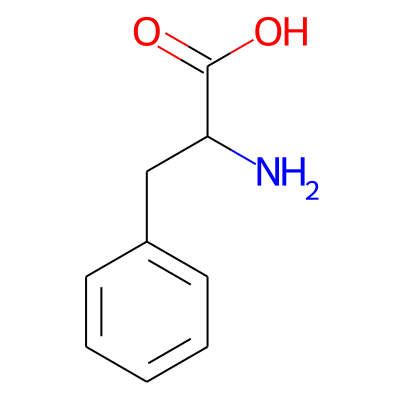
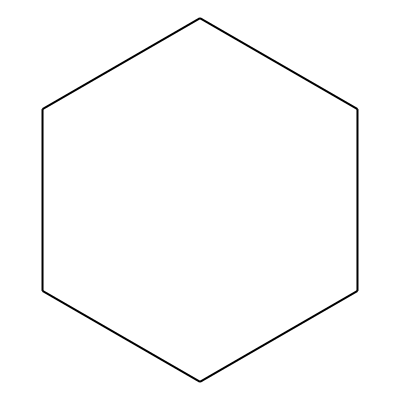
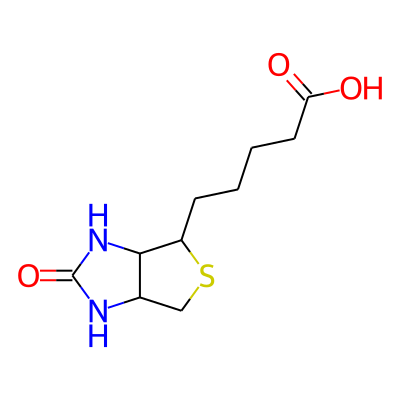
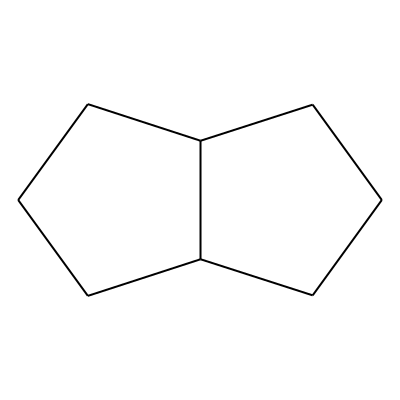
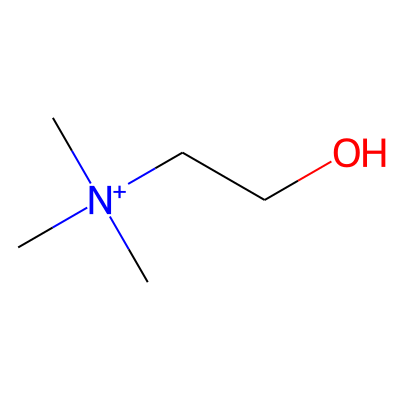
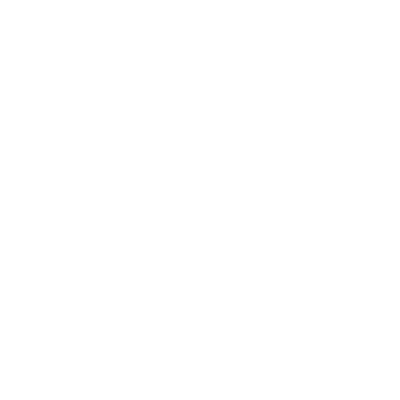
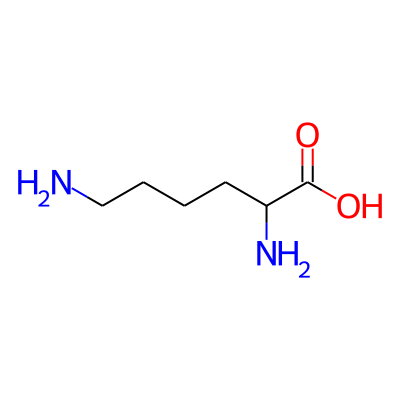
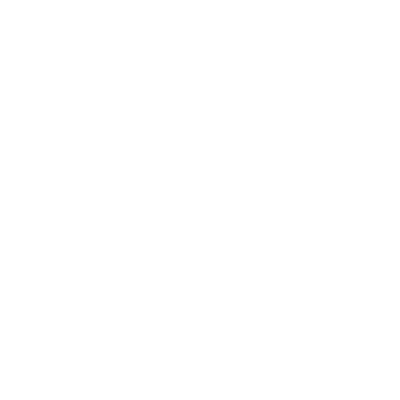
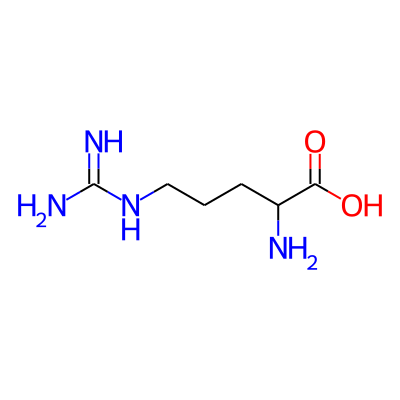
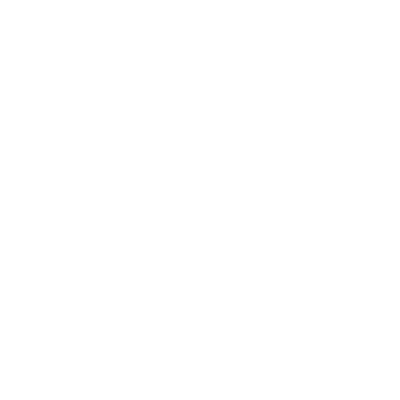
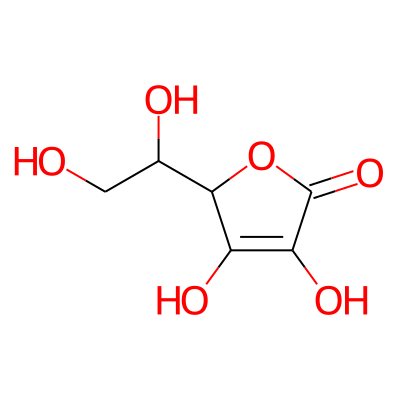
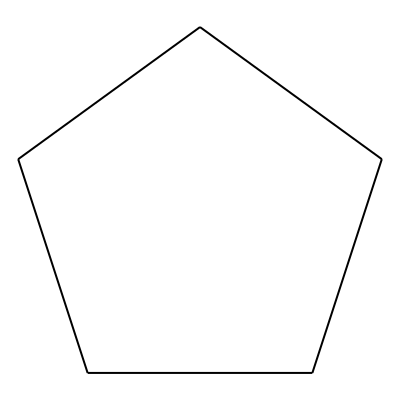
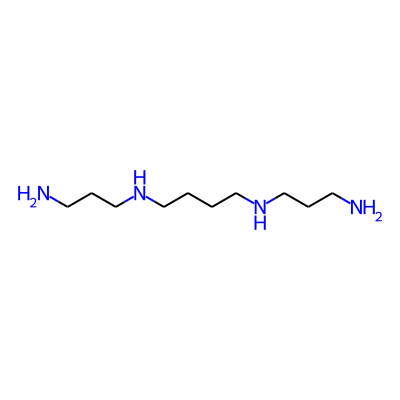
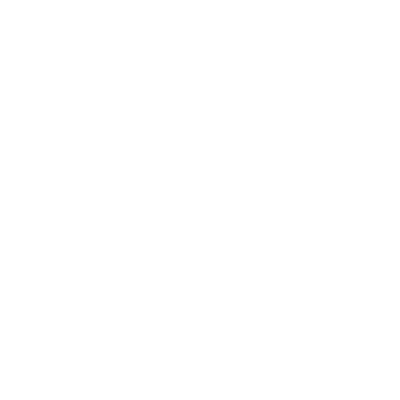

In [54]:
druggies['scaffold'] = druggies['mol'].apply(mol2scaffold)
druggies['scaffold_smiles'] = druggies['scaffold'].apply(lambda x: Chem.MolToSmiles(x))
HTML(druggies.head(20).to_html(formatters={'mol': mol2display_png, 'scaffold': mol2display_png}, escape=False))
#vykreslovat pres head, aby se to nekouslo

In [55]:
druggies_scaffolds = druggies.groupby('scaffold_smiles').count()
druggies_scaffolds.sort_values('scaffold', inplace=True, ascending=False)
druggies_scaffolds['scaffold_mol'] = ligands_scaffolds.index.to_series().apply(lambda x: Chem.MolFromSmiles(x))
druggies_scaffolds

,mol,scaffold,scaffold_mol
scaffold_smiles,,,
C1CCCCC1,1039,1039,"<img data-content=""rdkit/molecule"" src=""data:i..."
,982,982,"<img data-content=""rdkit/molecule"" src=""data:i..."
C1CCC2CCCC2C1,192,192,"<img data-content=""rdkit/molecule"" src=""data:i..."
C1CCCC1,188,188,"<img data-content=""rdkit/molecule"" src=""data:i..."
C1CCC(CC2CCCCC2)CC1,182,182,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...
C1CCC(CC(CCCC2CCC(CC3CC4CCCCC4C3)CC2)CCC2CCC3CCCCC32)CC1,1,1,NaN
C1CCC(CC(CCC2CCCC2)C2CCCCC2)CC1,1,1,NaN
C1CCC(CC(CCC2CC3CCCCC3C2)CC2CCCCC2)CC1,1,1,NaN


RDKit ERROR: [13:37:12] Explicit valence for atom # 48 C, 5, is greater than permitted
[13:37:12] Explicit valence for atom # 48 C, 5, is greater than permitted
RDKit ERROR: [13:37:12] Explicit valence for atom # 41 C, 5, is greater than permitted
[13:37:12] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [13:37:14] Explicit valence for atom # 30 C, 6, is greater than permitted
[13:37:14] Explicit valence for atom # 30 C, 6, is greater than permitted
RDKit ERROR: [13:37:14] Explicit valence for atom # 14 C, 10, is greater than permitted
[13:37:14] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [13:37:15] Explicit valence for atom # 28 C, 5, is greater than permitted
[13:37:15] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [13:37:15] Explicit valence for atom # 30 C, 6, is greater than permitted
[13:37:15] Explicit valence for atom # 30 C, 6, is greater than permitted
RDKit WARNING: [13:37:15] WARNIN

,scaffold,scaffold_mol
scaffold_smiles,,
C1CCCCC1,1039,
,982,
C1CCC2CCCC2C1,192,
C1CCCC1,188,
C1CCC(CC2CCCCC2)CC1,182,
C1CCC(C2CCCC2)CC1,176,
C1CCC2CCCCC2C1,170,
C1CCC2C(C1)CCC2C1CCCC1,166,
C1CCC2C(C1)CCC1C3CCCC3CCC21,151,

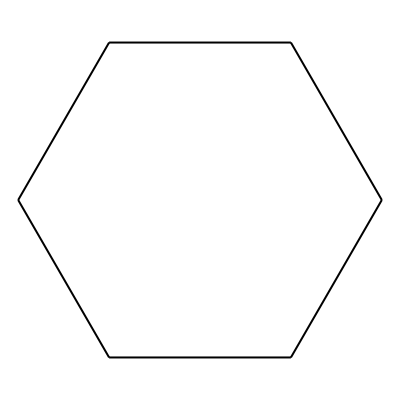
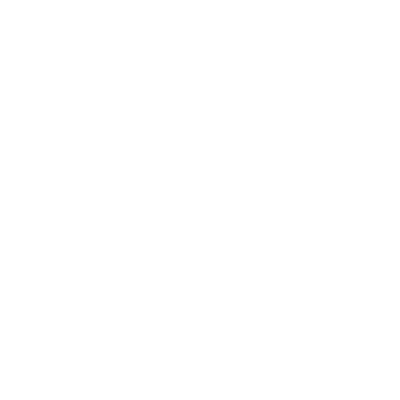
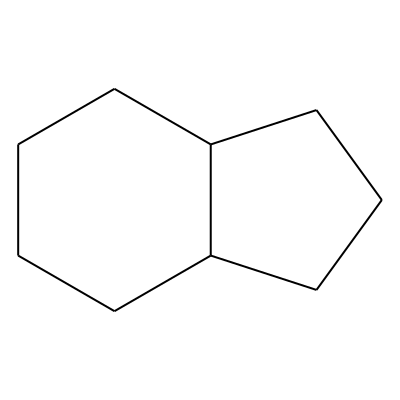
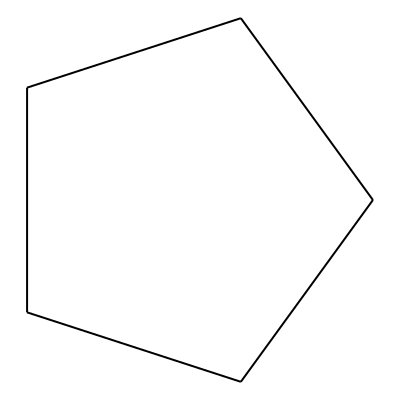
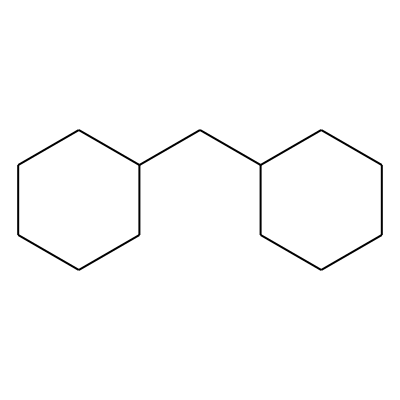
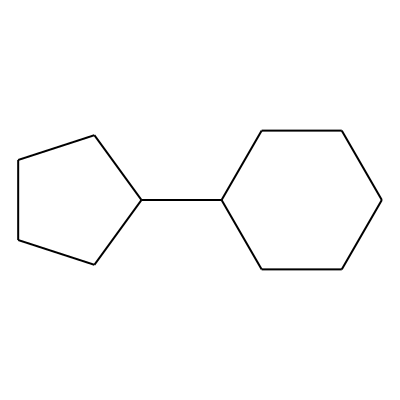
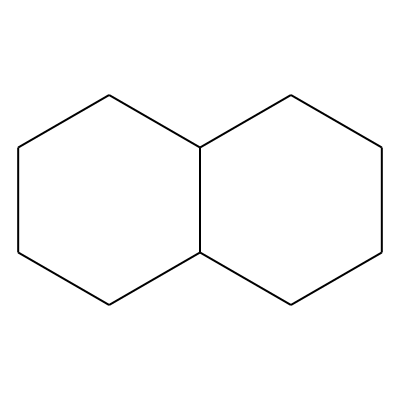
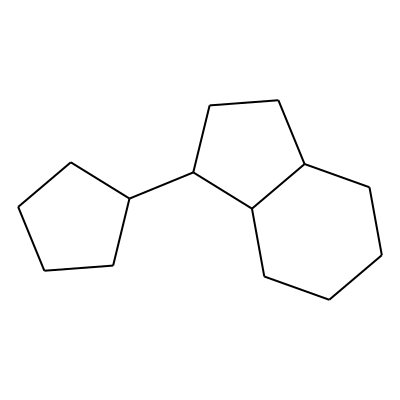
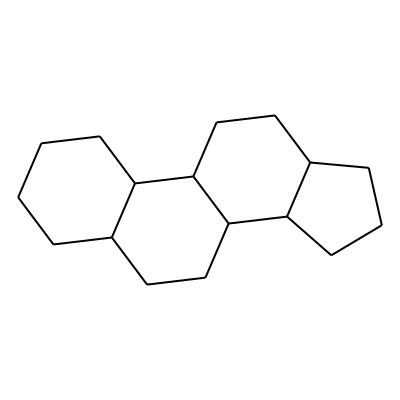
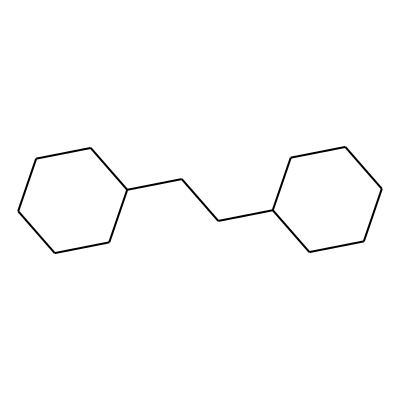
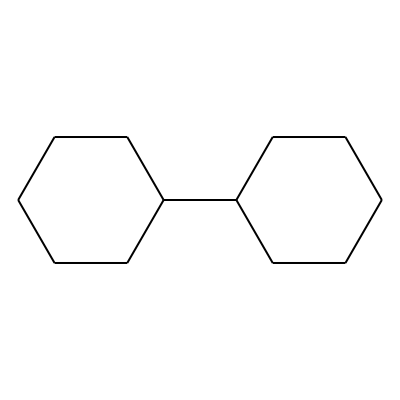
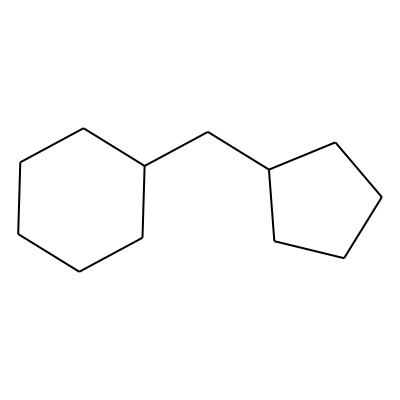
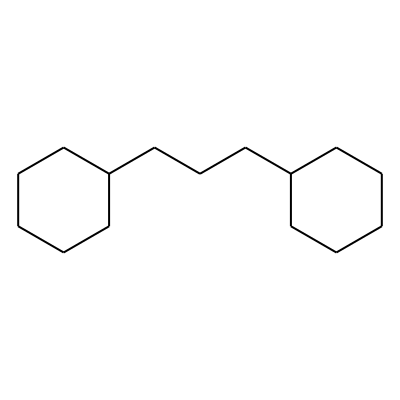
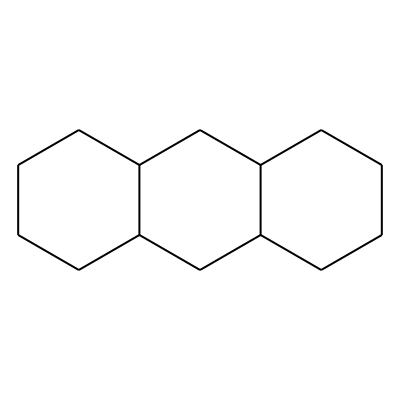
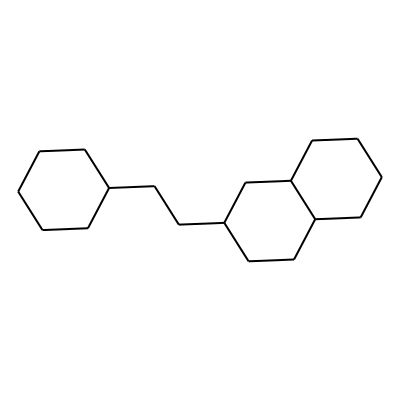
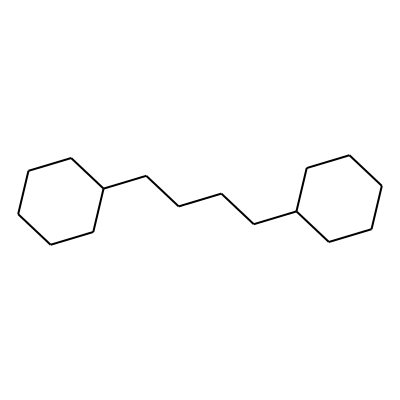
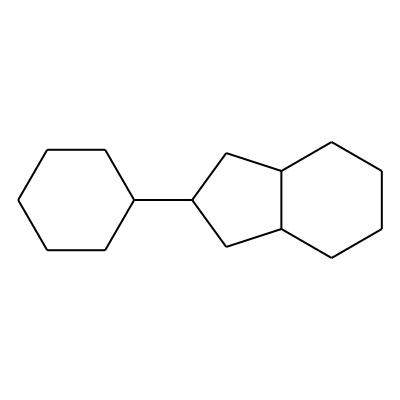
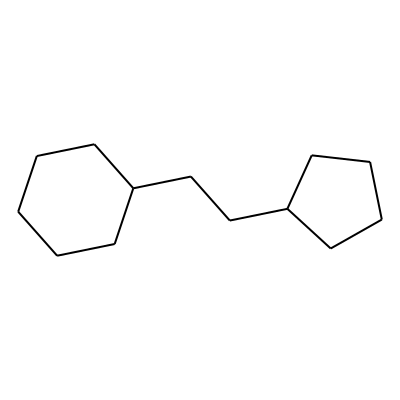
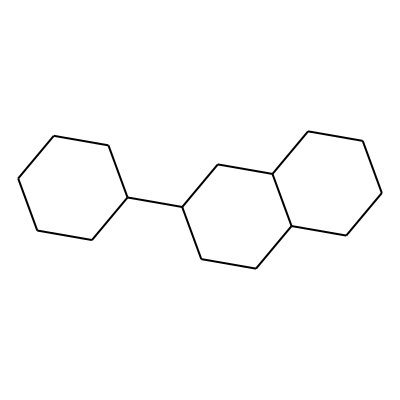
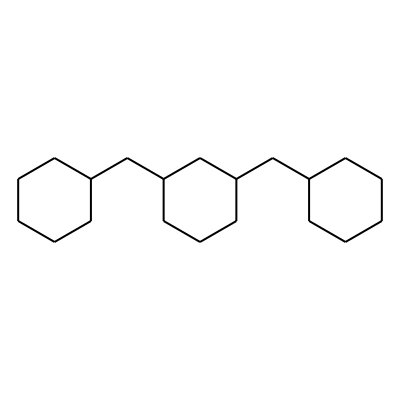

In [58]:
druggies['scaffold'] = druggies['mol'].apply(mol2scaffold)
druggies['scaffold_smiles'] = druggies['scaffold'].apply(lambda x: Chem.MolToSmiles(x))
HTML(druggies_scaffolds[['scaffold', 'scaffold_mol']].head(20).to_html(
    formatters={'scaffold_mol': mol2display_png}, escape=False))

In [60]:
druggies.head()

,mol,scaffold,scaffold_smiles
0,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CC...
1,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2...
2,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CC...
3,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCC...
4,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1


In [61]:
ligands.head()

,mol,scaffold,scaffold_smiles
0,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C1CCC2C(C1)CCC1CCCCC12
1,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C1CCC2CCCCC2C1
2,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C(CCCCC1CCCC2CCCCC12)CCCC1CC1
3,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C1CCC2CCCC2C1
4,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...",C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1
